# Machine Learning Case Study: predicting minimum cost of a bank's telemarketing campaign

# About the project
This Machine Learning project is based on the 2014 original study: "A data-driven approach to predict the success of bank telemarketing" (can be found here) in which the authors conducted a Data Mining (DM) approach to predict the success of telemarketing calls for selling bank long-term deposits of a Portuguese retail bank.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

# Dataset Information
The dataset used for the current case study has 41188 samples and 16 inputs.

bank_marketing_campaign.csv can be downloaded here.
There are also 4 original datasets:

bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
You can download the zip file (4 datasets) here. The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

# Attribute Information
The dataset contains information about all customers targeted by the campaign. Next, all the input variables:

Bank client data:
age (numeric)
job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
default: has credit in default? (categorical: 'no','yes','unknown')
housing: has housing loan? (categorical: 'no','yes','unknown')
loan: has personal loan? (categorical: 'no','yes','unknown')

# Other attributes:
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
previous: number of contacts performed before this campaign and for this client (numeric)
poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# Social and economic context attributes:
emp.var.rate: employment variation rate - quarterly indicator (numeric)
cons.price.idx: consumer price index - monthly indicator (numeric)
cons.conf.idx: consumer confidence index - monthly indicator (numeric)
euribor3m: euribor 3 month rate - daily indicator (numeric)
nr.employed: number of employed citizens - quarterly indicator (numeric)

# Output variable (desired target):
y - has the client subscribed a term deposit? (binary: 'yes','no')

# The current case study
The dataset stores information — 2008 to 2015 — of a marketing sales operation (telemarketing) implemented by a Portuguese bank’s marketing team to attract customers to subscribe term deposits, classifying the results as ‘yes’ and ‘no’ into a binary categorical variable.

Until that time, the strategy was to reach the maximum number of clients, indiscriminately, and try to sell them the financial product over the phone. However, that approach, besides spending many resources was also very uncomfortable for many clients disturbed by this type of action.

To determine the costs of the campaign, the marketing team has concluded:

For each customer identified as a good candidate and therefore defined as a target of the campaign but doesn't subscribe the term deposit, the bank had a cost of 500 EUR.
For each customer who was identified as a bad candidate and therfore excluded from the target of the campaign but was actually a good candidate and would subscribe the product, the bank had a cost of 2000 EUR.

# Machine Learning problem and objectives
We're facing a binary classification problem. Based on the above costs information, the goal is to train the best machine learning model that is able to predict and select the optimal number of candidates to be targeted by the campaign in order to reduce costs and maximizing efficiency.

# Project structure
The project is divided into three main categories:

1. EDA: Exploratory Data Analysis
2. Data Wrangling (Cleaning and Feature Engeneering)
3. Machine Learning: (Predictive Modeling)

# Performance Metric
The performance metric in use for evaluation is the total costs (EUR) since the objective is to determine both minimum costs and maximum efficiency of the marketing campaign.

# Set-up
To get (download) the data, click or copy and past this URL in a browser: https://bit.ly/31a0EAL (monitorized link)

In [1]:
# import the libraries
import pandas as pd
from pandas.plotting import table
import numpy as np
import pingouin as pg
import seaborn as sns

import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr

from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

from IPython.display import Image
#from category_encoders import BinaryEncoder
import pydotplus

import matplotlib.pyplot as plt
%matplotlib inline

seed = 42

C:\Users\Lenovo\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# Loading the datset
df = pd.read_csv('Documents/bank_marketing_campaign.csv')

In [3]:
# Briefly visualization of the dataset (display the first five rows by default)
df.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Converting the target from binary/categoric into binary/numeric
df['target'] = df.apply(lambda row: 1 if row["y"] == "yes" else 0, axis=1)
df.drop(["y"],axis=1,inplace=True)

In [5]:
# Renaming some columns for better typing and calling variables
df.rename(columns={"emp.var.rate":"emp_var_rate",
                   "cons.price.idx":"cons_price_idx",
                   "cons.conf.idx":"cons_conf_idx",
                   "nr.employed":"nr_employed"}
          ,inplace=True)

# Basic info of the dataset

In [6]:
# Printing number of observations and variables, including the target
print(f"Number of clients:  {df.shape[0]}") # Number of observations
print(f"Number of variables:   {df.shape[1]} incl. target") # Number of variables or attributes

Number of clients:  41188
Number of variables:   16 incl. target



[0] Number of clients that haven't subscribed the term deposit: ... 36548
[1] Number of clients that have subscribed the term deposit: ....... 4640



,clients,%
0,36548,88.73
1,4640,11.27


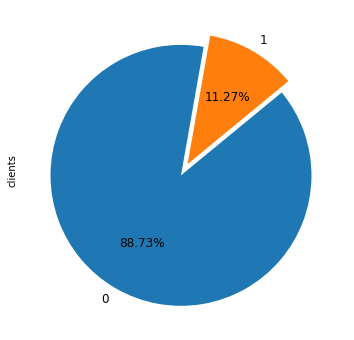

In [7]:
# How many clients have subscribed the term deposit and how many didn't?
absolut = df.target.value_counts().to_frame().rename(columns={"target":"clients"})
percent = (df.target.value_counts(normalize=True)*100).to_frame().rename(columns={"target":"%"})
df_bal = pd.concat([absolut,percent],axis=1).round(decimals=2)
print("")
print(f"[0] Number of clients that haven't subscribed the term deposit: ... {df.target.value_counts()[0]}")
print(f"[1] Number of clients that have subscribed the term deposit: ....... {df.target.value_counts()[1]}")
print("")
display(df_bal)
absolut.plot(kind='pie', subplots=True, autopct='%1.2f%%', 
             explode= (0.05, 0.05), startangle=80, 
             legend=False, fontsize=12, figsize=(14,6));

# The dataset is highly unbalanced.
From the above information we can clearly state that the dataset is absolutely unbalanced with the 0:'no' aproximately 8 times higher than 1:'yes'.

# Exploratory Data Analysis(EDA)

In [8]:
# Type of variables
df.dtypes.sort_values(ascending=True)

age                 int64
pdays               int64
previous            int64
target              int64
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
poutcome           object
dtype: object

In [9]:
# Counting variables by type
df.dtypes.value_counts(ascending=True)

int64      4
float64    5
object     7
dtype: int64

In [10]:
# Detecting missing values
display(df.isnull().sum())
print("")
print(f"Are there any missing values? {df.isnull().values.any()}")

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
target            0
dtype: int64


Are there any missing values? False


In [11]:
# Overview of shape, attributes, types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   pdays           41188 non-null  int64  
 8   previous        41188 non-null  int64  
 9   poutcome        41188 non-null  object 
 10  emp_var_rate    41188 non-null  float64
 11  cons_price_idx  41188 non-null  float64
 12  cons_conf_idx   41188 non-null  float64
 13  euribor3m       41188 non-null  float64
 14  nr_employed     41188 non-null  float64
 15  target          41188 non-null  int64  
dtypes: float64(5), int64(4), object(7)
memory usage: 5.0+ MB


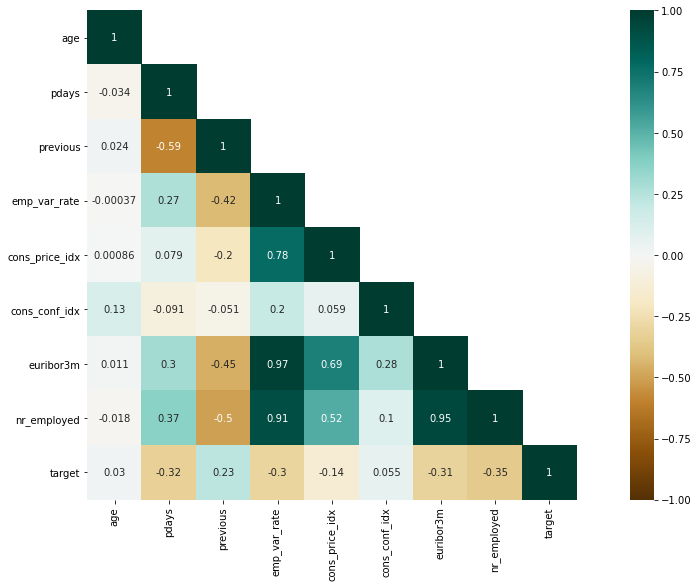

In [12]:
# Visualization of correlations (heatmap)
mask = np.triu(df.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin = -1, square=True, cmap='BrBG', mask=mask);

In [13]:
# General stats of numeric variables
df.describe()

,age,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [14]:
# General stats of categoric variables
df.describe(include=['object'])

,job,marital,education,default,housing,loan,poutcome
count,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,3
top,admin.,married,university.degree,no,yes,no,nonexistent
freq,10422,24928,12168,32588,21576,33950,35563


# Statistic description of all variables

# Numeric variables (df_num)

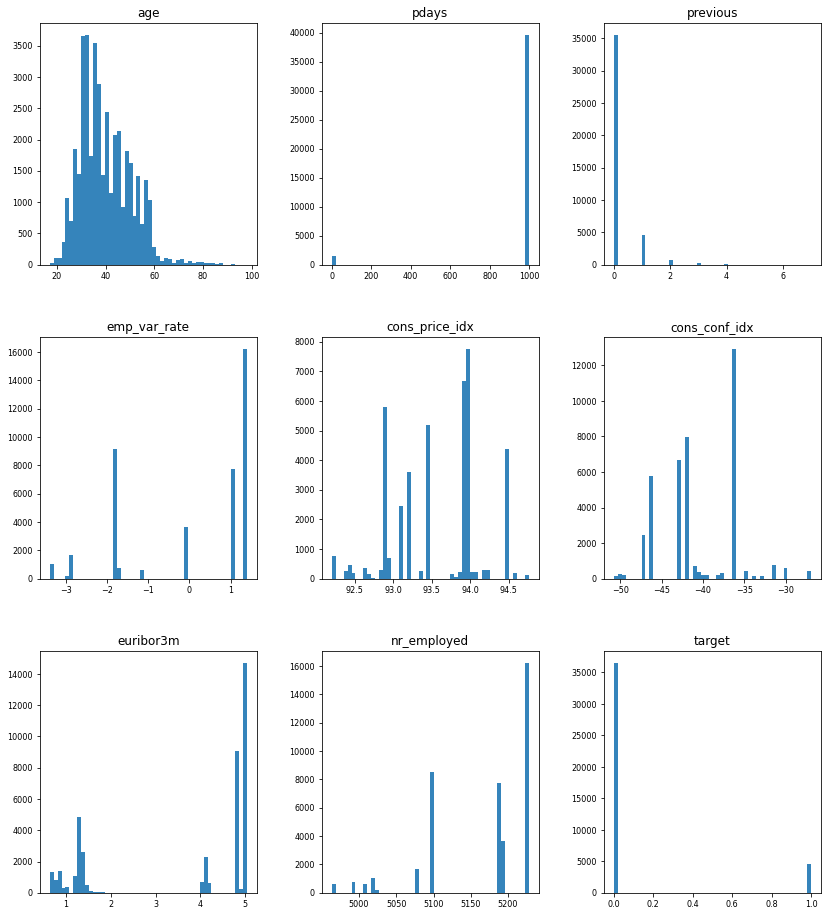

In [15]:
# Graphic visualization of the numeric distribution
df.hist(figsize=(14, 16), bins=50, xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.show()

# Variable: age

Variable: 'age'
Discription: clients' age
Type of variable: int64
Type of distribution: continuous
Total observations: 41188
Missing values: 0
Unique values: 78
Min: 17
25%: 32
Median: 38.0
75%: 47
Max: 98
Mean: 40.02406040594348
Std dev: 10.421249980934235
Variance: 108.60245116512178
Skewness: 0.7846682380932289
Kurtosis: 0.7910698035273853



C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


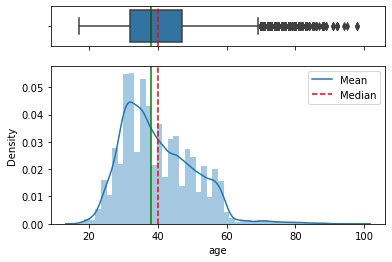

Percentiles 1%, 5%, 95%, 99%


0.01    23.0
0.05    26.0
0.95    58.0
0.99    71.0
Name: age, dtype: float64

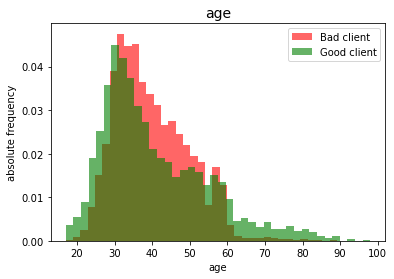

In [16]:
print("Variable: 'age'")
print("Discription: clients' age")
print(f"Type of variable: {df.age.dtype}")
print(f"Type of distribution: continuous")
print(f"Total observations: {df.age.shape[0]}")
print(f"Missing values: {df.age.isnull().sum()}")
print(f"Unique values: {df.age.nunique()}")
print(f"Min: {df.age.min()}")
print(f"25%: {int(df.age.quantile(q=[.25]).iloc[-1])}")
print(f"Median: {df.age.median()}")
print(f"75%: {int(df.age.quantile(q=[.75]).iloc[-1])}")
print(f"Max: {df.age.max()}")
print(f"Mean: {df.age.mean()}")
print(f"Std dev: {df.age.std()}")
print(f"Variance: {df.age.var()}")
print(f"Skewness: {scipy.stats.skew(df.age)}")
print(f"Kurtosis: {scipy.stats.kurtosis(df.age)}")
print("")

# Visualization of 'age'
age = df.age
np.array(age).mean()
np.median(age)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(age).mean()
median=np.median(age)

sns.boxplot(age, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(age, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

# Calculus of percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.age.quantile(q=[.01, .05, .95, .99]))
print("")

# Visualization variable vs. target
age_0 = df[df.target == 0].iloc[:,:1]
age_1 = df[df.target == 1].iloc[:,:1]

a = np.array(age_0)
b = np.array(age_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(b, bins=40, density=True, color="g", alpha = 0.6, label='Good client')
plt.legend(loc='upper right')
plt.title('age', fontsize=14)
plt.xlabel('age')
plt.ylabel('absolute frequency')
plt.show()

# Variable: pday

Variable: 'pdays'
Discription: number of days that passed by after the client was last contacted from a previous campaign
Type of variable: int64
Type of distribution: discrete
Total observations: 41188
Missing values: 0
Unique values: 27
Min: 0
25%: 999
Median: 999.0
75%: 999
Max: 999
Mean: 962.4754540157328
Std dev: 186.9109073447436
Variance: 34935.68728443533
Skewness: -4.922010656450045
Kurtosis: 22.2266185118177



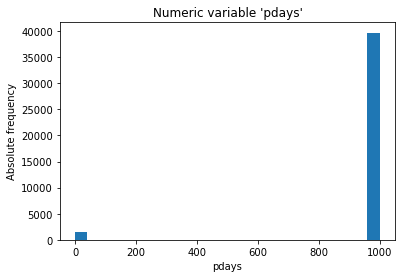

Percentiles 1%, 5%, 95%, 99%


0.01      3.0
0.05    999.0
0.95    999.0
0.99    999.0
Name: pdays, dtype: float64

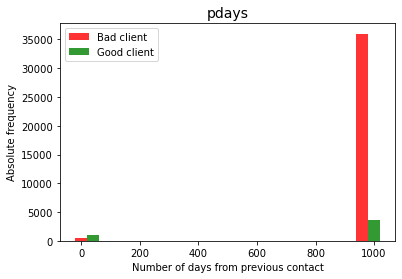

In [17]:
print("Variable: 'pdays'")
print("Discription: number of days that passed by after the client was last contacted from a previous campaign")
print(f"Type of variable: {df.pdays.dtype}")
print(f"Type of distribution: discrete")
print(f"Total observations: {df.pdays.shape[0]}")
print(f"Missing values: {df.pdays.isnull().sum()}")
print(f"Unique values: {df.pdays.nunique()}")
print(f"Min: {df.pdays.min()}")
print(f"25%: {int(df.pdays.quantile(q=[.25]).iloc[-1])}")
print(f"Median: {df.pdays.median()}")
print(f"75%: {int(df.pdays.quantile(q=[.75]).iloc[-1])}")
print(f"Max: {df.pdays.max()}")
print(f"Mean: {df.pdays.mean()}")
print(f"Std dev: {df.pdays.std()}")
print(f"Variance: {df.pdays.var()}")
print(f"Skewness: {scipy.stats.skew(df.pdays)}")
print(f"Kurtosis: {scipy.stats.kurtosis(df.pdays)}")
print("")

# Visualization of 'pdays'
plt.hist(df.pdays, bins=25)
plt.title('Numeric variable \'pdays\'', fontsize=12)
plt.xlabel('pdays')
plt.ylabel('Absolute frequency')
plt.show()

# Calculus percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.pdays.quantile(q=[.01, .05, .95, .99]))
print("")

# Visualization variable vs. target
pdays_0 = df[df.target == 0].iloc[:,7:8]
pdays_1 = df[df.target == 1].iloc[:,7:8]

a = np.array(pdays_0)
b = np.array(pdays_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=False, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=25, density=False, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper left')
plt.title('pdays', fontsize=14)
plt.xlabel('Number of days from previous contact')
plt.ylabel('Absolute frequency')
plt.show()

# Variable: Previous 

Variable: 'previous'
Discription: number of contacts performed before this campaign and for this client
Type of variable: int64
Type of distribution: discrete
Total observations: 41188
Missing values: 0
Unique values: 8
Min: 0
25%: 0
Median: 0.0
75%: 0
Max: 7
Mean: 0.17296299893172767
Std dev: 0.4949010798393183
Variance: 0.24492707882612333
Skewness: 3.8319026847007014
Kurtosis: 20.106229526902816



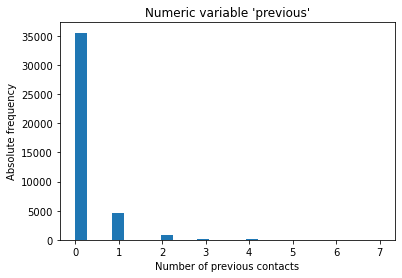

Percentiles 1%, 5%, 95%, 99%


0.01    0.0
0.05    0.0
0.95    1.0
0.99    2.0
Name: previous, dtype: float64

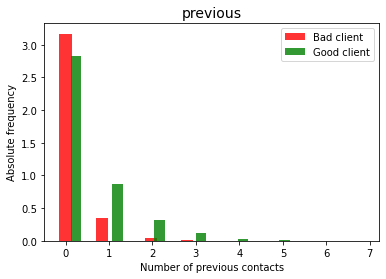

In [18]:
print("Variable: 'previous'")
print("Discription: number of contacts performed before this campaign and for this client")
print(f"Type of variable: {df.previous.dtype}")
print(f"Type of distribution: discrete")
print(f"Total observations: {df.previous.shape[0]}")
print(f"Missing values: {df.previous.isnull().sum()}")
print(f"Unique values: {df.previous.nunique()}")
print(f"Min: {df.previous.min()}")
print(f"25%: {int(df.previous.quantile(q=[.25]).iloc[-1])}")
print(f"Median: {df.previous.median()}")
print(f"75%: {int(df.previous.quantile(q=[.75]).iloc[-1])}")
print(f"Max: {df.previous.max()}")
print(f"Mean: {df.previous.mean()}")
print(f"Std dev: {df.previous.std()}")
print(f"Variance: {df.previous.var()}")
print(f"Skewness: {scipy.stats.skew(df.previous)}")
print(f"Kurtosis: {scipy.stats.kurtosis(df.previous)}")
print("")

# Visualization of the numeric variable 'pdays'
plt.hist(df.previous, bins=25)
plt.title('Numeric variable \'previous\'', fontsize=12)
plt.xlabel('Number of previous contacts')
plt.ylabel('Absolute frequency')
plt.show()

# Cslculus of percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.previous.quantile(q=[.01, .05, .95, .99]))
print("")

# Visualization variable vs. target
previous_0 = df[df.target == 0].iloc[:,8:9]
previous_1 = df[df.target == 1].iloc[:,8:9]

a = np.array(previous_0)
b = np.array(previous_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=25, density=True, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper right')
plt.title('previous', fontsize=14)
plt.xlabel('Number of previous contacts')
plt.ylabel('Absolute frequency')
plt.show()

# Variable: emp_var_rate

Variable: 'emp_var_rate'
Discription: employment variation rate - quarterly indicator
Type of variable: float64
Type of distribution: discrete
Total observations: 41188
Missing values: 0
Unique values: 10
Min: -3.4
25%: -1
Median: 1.1
75%: 1
Max: 1.4
Mean: 0.0818855006319146
Std dev: 1.5709597405172309
Variance: 2.4679145063259655
Skewness: -0.7240691785977529
Kurtosis: -1.0626482012872505



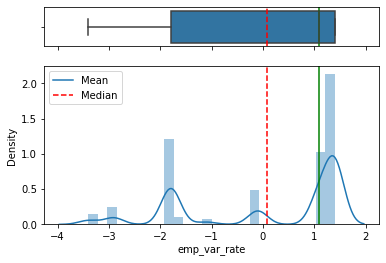

Percentiles 1%, 5%, 95%, 99%


0.01   -3.4
0.05   -2.9
0.95    1.4
0.99    1.4
Name: emp_var_rate, dtype: float64

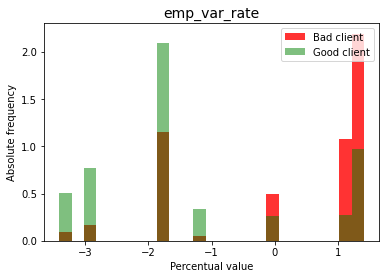

In [19]:
print("Variable: 'emp_var_rate'")
print("Discription: employment variation rate - quarterly indicator")
print(f"Type of variable: {df.emp_var_rate.dtype}")
print(f"Type of distribution: discrete")
print(f"Total observations: {df.emp_var_rate.shape[0]}")
print(f"Missing values: {df.emp_var_rate.isnull().sum()}")
print(f"Unique values: {df.emp_var_rate.nunique()}")
print(f"Min: {df.emp_var_rate.min()}")
print(f"25%: {int(df.emp_var_rate.quantile(q=[.25]).iloc[-1])}")
print(f"Median: {df.emp_var_rate.median()}")
print(f"75%: {int(df.emp_var_rate.quantile(q=[.75]).iloc[-1])}")
print(f"Max: {df.emp_var_rate.max()}")
print(f"Mean: {df.emp_var_rate.mean()}")
print(f"Std dev: {df.emp_var_rate.std()}")
print(f"Variance: {df.emp_var_rate.var()}")
print(f"Skewness: {scipy.stats.skew(df.emp_var_rate)}")
print(f"Kurtosis: {scipy.stats.kurtosis(df.emp_var_rate)}")
print("")

# Visualization of the numeric 'emp_var_rate'
emp_var_rate = df.emp_var_rate
np.array(emp_var_rate).mean()
np.median(emp_var_rate)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(emp_var_rate).mean()
median=np.median(emp_var_rate)

sns.boxplot(emp_var_rate, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(emp_var_rate, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

# Calculus of percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.emp_var_rate.quantile(q=[.01, .05, .95, .99]))
print("")

# Visualization of variable vs. target
emp_var_rate_0 = df[df.target == 0].iloc[:,10:11]
emp_var_rate_1 = df[df.target == 1].iloc[:,10:11]

a = np.array(emp_var_rate_0)
b = np.array(emp_var_rate_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.8, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper right')
plt.title('emp_var_rate', fontsize=14)
plt.xlabel('Percentual value')
plt.ylabel('Absolute frequency')
plt.show()

# Variable: cons_price_idx

Variable: 'cons_price_idx'
Discription: consumer price index - monthly indicator
Type of variable: float64
Type of distribution: discrete
Total observations: 41188
Missing values: 0
Unique values: 26
Min: 92.20100000000001
25%: 93
Median: 93.749
75%: 93
Max: 94.76700000000001
Mean: 93.57566436831263
Std dev: 0.5788400489541813
Variance: 0.335055802273279
Skewness: -0.23087924271977578
Kurtosis: -0.8298535163032743



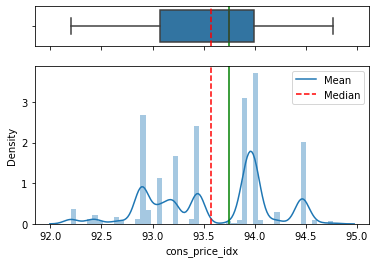

Percentiles 1%, 5%, 95%, 99%


0.01    92.201
0.05    92.713
0.95    94.465
0.99    94.465
Name: cons_price_idx, dtype: float64

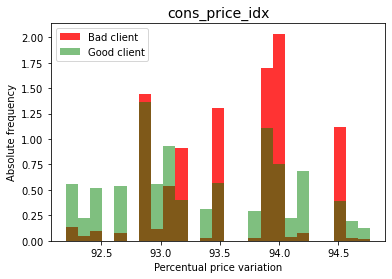

In [20]:
print("Variable: 'cons_price_idx'")
print("Discription: consumer price index - monthly indicator")
print(f"Type of variable: {df.cons_price_idx.dtype}")
print(f"Type of distribution: discrete")
print(f"Total observations: {df.cons_price_idx.shape[0]}")
print(f"Missing values: {df.cons_price_idx.isnull().sum()}")
print(f"Unique values: {df.cons_price_idx.nunique()}")
print(f"Min: {df.cons_price_idx.min()}")
print(f"25%: {int(df.cons_price_idx.quantile(q=[.25]).iloc[-1])}")
print(f"Median: {df.cons_price_idx.median()}")
print(f"75%: {int(df.cons_price_idx.quantile(q=[.75]).iloc[-1])}")
print(f"Max: {df.cons_price_idx.max()}")
print(f"Mean: {df.cons_price_idx.mean()}")
print(f"Std dev: {df.cons_price_idx.std()}")
print(f"Variance: {df.cons_price_idx.var()}")
print(f"Skewness: {scipy.stats.skew(df.cons_price_idx)}")
print(f"Kurtosis: {scipy.stats.kurtosis(df.cons_price_idx)}")
print("")

# Visualization of numeric 'cons_price_idx'
cons_price_idx = df.cons_price_idx
np.array(cons_price_idx).mean()
np.median(cons_price_idx)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(cons_price_idx).mean()
median=np.median(cons_price_idx)

sns.boxplot(cons_price_idx, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(cons_price_idx, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

# Calculus of percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.cons_price_idx.quantile(q=[.01, .05, .95, .99]))
print("")

# Visualization of variable vs. target
cons_price_idx_0 = df[df.target == 0].iloc[:,11:12]
cons_price_idx_1 = df[df.target == 1].iloc[:,11:12]

a = np.array(cons_price_idx_0)
b = np.array(cons_price_idx_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.8, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper left')
plt.title('cons_price_idx', fontsize=14)
plt.xlabel('Percentual price variation')
plt.ylabel('Absolute frequency')
plt.show()

# Variable: cons_conf_idx

Variable: 'cons_conf_idx'
Discription: consumer confidence index - monthly indicator
Type of variable: float64
Type of distribution: discrete
Total observations: 41188
Missing values: 0
Unique values: 26
Min: -50.8
25%: -42
Median: -41.8
75%: -36
Max: -26.9
Mean: -40.50260027191399
Std dev: 4.628197856174375
Variance: 21.420215395897085
Skewness: 0.3031688173189229
Kurtosis: -0.35866045494457843



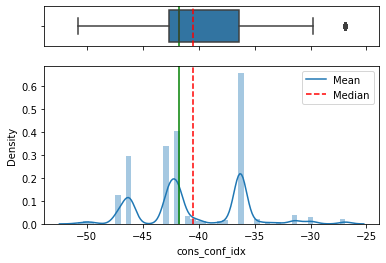

Percentiles 1%, 5%, 95%, 99%


0.01   -49.5
0.05   -47.1
0.95   -33.6
0.99   -26.9
Name: cons_conf_idx, dtype: float64

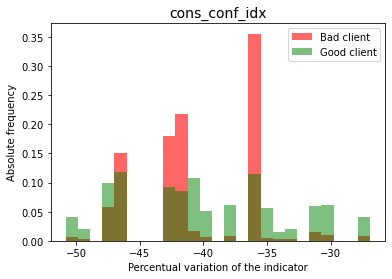

In [21]:

print("Variable: 'cons_conf_idx'")
print("Discription: consumer confidence index - monthly indicator")
print(f"Type of variable: {df.cons_conf_idx.dtype}")
print(f"Type of distribution: discrete")
print(f"Total observations: {df.cons_conf_idx.shape[0]}")
print(f"Missing values: {df.cons_conf_idx.isnull().sum()}")
print(f"Unique values: {df.cons_conf_idx.nunique()}")
print(f"Min: {df.cons_conf_idx.min()}")
print(f"25%: {int(df.cons_conf_idx.quantile(q=[.25]).iloc[-1])}")
print(f"Median: {df.cons_conf_idx.median()}")
print(f"75%: {int(df.cons_conf_idx.quantile(q=[.75]).iloc[-1])}")
print(f"Max: {df.cons_conf_idx.max()}")
print(f"Mean: {df.cons_conf_idx.mean()}")
print(f"Std dev: {df.cons_conf_idx.std()}")
print(f"Variance: {df.cons_conf_idx.var()}")
print(f"Skewness: {scipy.stats.skew(df.cons_conf_idx)}")
print(f"Kurtosis: {scipy.stats.kurtosis(df.cons_conf_idx)}")
print("")

# Visualization of numeric 'cons_conf_idx'
cons_conf_idx = df.cons_conf_idx
np.array(cons_conf_idx).mean()
np.median(cons_conf_idx)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(cons_conf_idx).mean()
median=np.median(cons_conf_idx)

sns.boxplot(cons_conf_idx, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(cons_conf_idx, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

# Calculus of percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.cons_conf_idx.quantile(q=[.01, .05, .95, .99]))
print("")

# Visualization of variable vs. target
cons_conf_idx_0 = df[df.target == 0].iloc[:,12:13]
cons_conf_idx_1 = df[df.target == 1].iloc[:,12:13]

a = np.array(cons_conf_idx_0)
b = np.array(cons_conf_idx_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper right')
plt.title('cons_conf_idx', fontsize=14)
plt.xlabel('Percentual variation of the indicator')
plt.ylabel('Absolute frequency')
plt.show()

# Variable: euribor3m

Variable: 'euribor3m'
Discription: euribor 3 month rate - daily indicator
Type of variable: float64
Type of distribution: discrete
Total observations: 41188
Missing values: 0
Unique values: 316
Min: 0.634
25%: 1
Median: 4.857
75%: 4
Max: 5.045
Mean: 3.621290812858068
Std dev: 1.7344474048511707
Variance: 3.0083078001949604
Skewness: -0.7091621286441162
Kurtosis: -1.4067775199378407



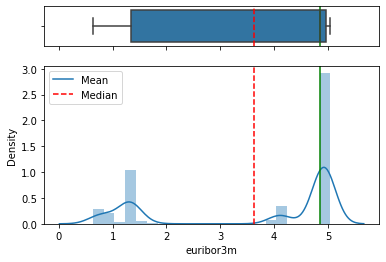

Percentiles 1%, 5%, 95%, 99%


0.01    0.65848
0.05    0.79700
0.95    4.96600
0.99    4.96800
Name: euribor3m, dtype: float64

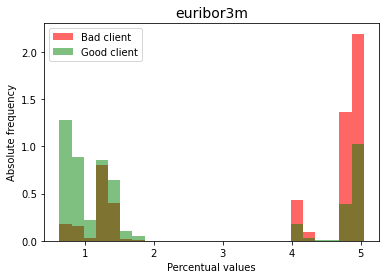

In [22]:
print("Variable: 'euribor3m'")
print("Discription: euribor 3 month rate - daily indicator")
print(f"Type of variable: {df.euribor3m.dtype}")
print(f"Type of distribution: discrete")
print(f"Total observations: {df.euribor3m.shape[0]}")
print(f"Missing values: {df.euribor3m.isnull().sum()}")
print(f"Unique values: {df.euribor3m.nunique()}")
print(f"Min: {df.euribor3m.min()}")
print(f"25%: {int(df.euribor3m.quantile(q=[.25]).iloc[-1])}")
print(f"Median: {df.euribor3m.median()}")
print(f"75%: {int(df.euribor3m.quantile(q=[.75]).iloc[-1])}")
print(f"Max: {df.euribor3m.max()}")
print(f"Mean: {df.euribor3m.mean()}")
print(f"Std dev: {df.euribor3m.std()}")
print(f"Variance: {df.euribor3m.var()}")
print(f"Skewness: {scipy.stats.skew(df.euribor3m)}")
print(f"Kurtosis: {scipy.stats.kurtosis(df.euribor3m)}")
print("")

# Visualization of numeric 'euribor3m'
euribor3m = df.euribor3m
np.array(euribor3m).mean()
np.median(euribor3m)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(euribor3m).mean()
median=np.median(euribor3m)

sns.boxplot(euribor3m, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(euribor3m, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

# Calculus of percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.euribor3m.quantile(q=[.01, .05, .95, .99]))
print("")

# Visualization of variable vs. target
euribor3m_0 = df[df.target == 0].iloc[:,13:14]
euribor3m_1 = df[df.target == 1].iloc[:,13:14]

a = np.array(euribor3m_0)
b = np.array(euribor3m_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper left')
plt.title('euribor3m', fontsize=14)
plt.xlabel('Percentual values')
plt.ylabel('Absolute frequency')
plt.show()

# Variable: nr_employed

Variable: 'nr_employed'
Discription: number of employed citizens - quarterly indicator
Type of variable: float64
Total observations: 41188
Missing values: 0
Unique values: 11
Min: 4963.6
25%: 5099
Median: 5191.0
75%: 5228
Max: 5228.1
Mean: 5167.035910941844
Std dev: 72.25152766826527
Variance: 5220.283250398102
Skewness: -1.0442243763652297
Kurtosis: -0.003905589182342073



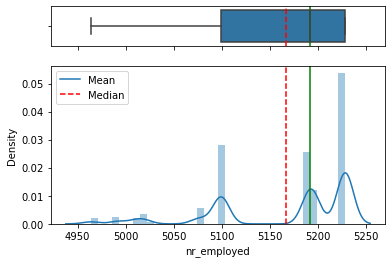

Percentiles 1%, 5%, 95%, 99%


0.01    4963.6
0.05    5017.5
0.95    5228.1
0.99    5228.1
Name: nr_employed, dtype: float64

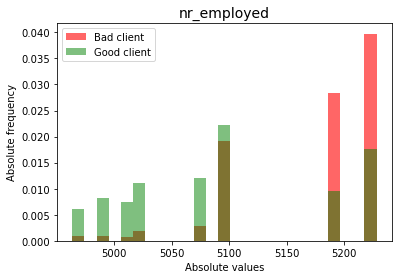

In [23]:
print("Variable: 'nr_employed'")
print("Discription: number of employed citizens - quarterly indicator")
print(f"Type of variable: {df.nr_employed.dtype}")
print(f"Total observations: {df.nr_employed.shape[0]}")
print(f"Missing values: {df.nr_employed.isnull().sum()}")
print(f"Unique values: {df.nr_employed.nunique()}")
print(f"Min: {df.nr_employed.min()}")
print(f"25%: {int(df.nr_employed.quantile(q=[.25]).iloc[-1])}")
print(f"Median: {df.nr_employed.median()}")
print(f"75%: {int(df.nr_employed.quantile(q=[.75]).iloc[-1])}")
print(f"Max: {df.nr_employed.max()}")
print(f"Mean: {df.nr_employed.mean()}")
print(f"Std dev: {df.nr_employed.std()}")
print(f"Variance: {df.nr_employed.var()}")
print(f"Skewness: {scipy.stats.skew(df.nr_employed)}")
print(f"Kurtosis: {scipy.stats.kurtosis(df.nr_employed)}")
print("")

# Visualização da variável numérica 'nr_employed'
nr_employed = df.nr_employed
np.array(nr_employed).mean()
np.median(nr_employed)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(nr_employed).mean()
median=np.median(nr_employed)

sns.boxplot(nr_employed, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(nr_employed, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

# Calculus of percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.nr_employed.quantile(q=[.01, .05, .95, .99]))
print("")

# Visualization of variable vs. target
nr_employed_0 = df[df.target == 0].iloc[:,14:15]
nr_employed_1 = df[df.target == 1].iloc[:,14:15]

a = np.array(nr_employed_0)
b = np.array(nr_employed_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper left')
plt.title('nr_employed', fontsize=14)
plt.xlabel('Absolute values')
plt.ylabel('Absolute frequency')
plt.show()

# Categorical variables (df_cat)

# Variable: job

Variable: 'job'
Discription: type of job
Type of variable: object
Total observations: 41188
Unique values: 12
List of unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']



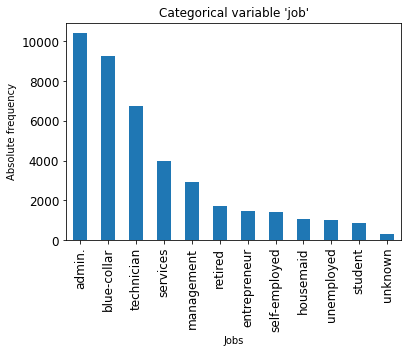

,Freq abs,percent %
admin.,10422,25.30
blue-collar,9254,22.47
technician,6743,16.37
services,3969,9.64
management,2924,7.10
retired,1720,4.18
entrepreneur,1456,3.54
self-employed,1421,3.45
housemaid,1060,2.57
unemployed,1014,2.46


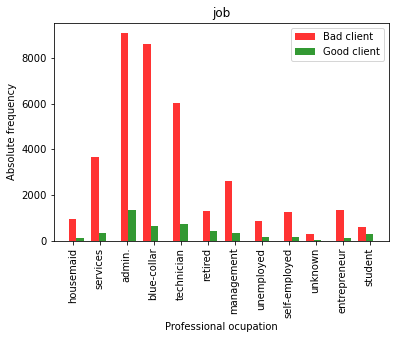

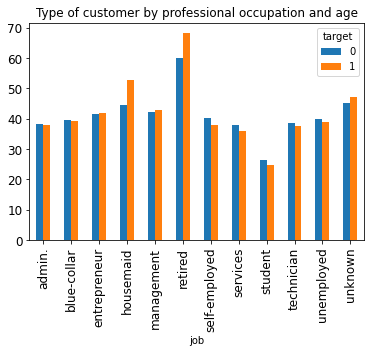

In [24]:
print("Variable: 'job'")
print("Discription: type of job")
print(f"Type of variable: {df.job.dtype}")
print(f"Total observations: {df.job.shape[0]}")
print(f"Unique values: {df.job.nunique()}")
print(f"List of unique values: {df.job.unique()}")
print("")

# Visualization of the categoric 'job'
data_count = df['job'].value_counts().plot(kind='bar', figsize=(6,4), fontsize=12)
plt.title('Categorical variable \'job\'', fontsize=12)
plt.xlabel('Jobs')
plt.ylabel('Absolute frequency')
plt.show()

# Number of observations by class
num_obs = df.job.value_counts()
num_o = pd.DataFrame(num_obs)
num_o.rename(columns={"job":"Freq abs"}, inplace=True)
num_o_pc = (df.job.value_counts(normalize=True) * 100).round(decimals=2)
num_obs_pc = pd.DataFrame(num_o_pc)
num_obs_pc.rename(columns={"job":"percent %"}, inplace=True)
n_obs = pd.concat([num_o,num_obs_pc], axis=1)
display(n_obs)

# Graph 'job' vs. 'target'
job_0 = df[df.target == 0].iloc[:,1:2]
job_1 = df[df.target == 1].iloc[:,1:2]

a = np.array(job_0)
b = np.array(job_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper right')
plt.title('job', fontsize=12)
plt.xlabel('Professional ocupation')
plt.xticks(rotation='vertical')
plt.ylabel('Absolute frequency')
plt.show()

# Graph: type of customer by professional occupation and age
#Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="job",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["job"], 
                       ascending=True).plot(kind="bar", 
                                             title=("Type of customer by professional occupation and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

# Variable: marital

Variable: 'marital'
Discription: Marital situation
Type of variable: object
Total observations: 41188
Unique values: 4
List of unique values: ['married' 'single' 'divorced' 'unknown']



,Freq abs,percent %
married,24928,60.52
single,11568,28.09
divorced,4612,11.20
unknown,80,0.19


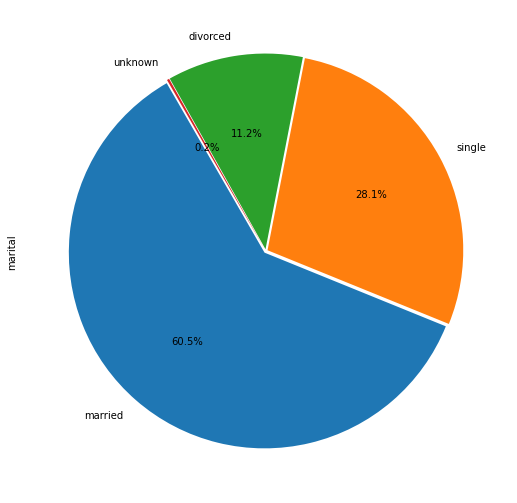

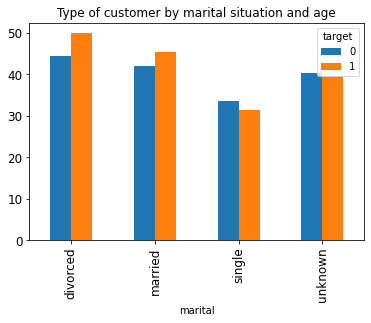

In [25]:
print("Variable: 'marital'")
print("Discription: Marital situation")
print(f"Type of variable: {df.marital.dtype}")
print(f"Total observations: {df.marital.shape[0]}")
print(f"Unique values: {df.marital.nunique()}")
print(f"List of unique values: {df.marital.unique()}")
print("")

# Graph "pie"
df['marital'].value_counts(dropna=False).plot(kind='pie', figsize=(14,9),
                                              explode = (0.01, 0.01, 0.01, 0.01),
                                              autopct='%1.1f%%',
                                              startangle=120);

# Number of observations by class
marital_obs = df.marital.value_counts()
marital_o = pd.DataFrame(marital_obs)
marital_o.rename(columns={"marital":"Freq abs"}, inplace=True)
marital_o_pc = (df.marital.value_counts(normalize=True) * 100).round(decimals=2)
marital_obs_pc = pd.DataFrame(marital_o_pc)
marital_obs_pc.rename(columns={"marital":"percent %"}, inplace=True)
marital_obs = pd.concat([marital_o,marital_obs_pc], axis=1)
display(marital_obs)

# Graph: Type of customer by marital situation and age
# Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="marital",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["marital"], 
                       ascending=True).plot(kind="bar", 
                                             title=("Type of customer by marital situation and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

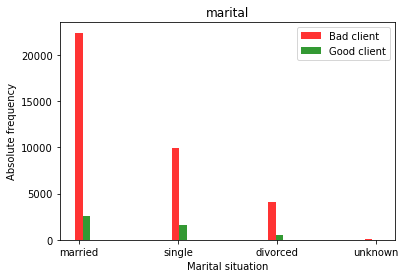

In [26]:
# Graph 'marital' vs. 'target'
marital_0 = df[df.target == 0].iloc[:,2:3]
marital_1 = df[df.target == 1].iloc[:,2:3]

a = np.array(marital_0)
b = np.array(marital_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper right')
plt.title('marital', fontsize=12)
plt.xlabel('Marital situation')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

# Variable: education

Variable: 'education'
Discription: Education level
Type of variable: object
Total observations: 41188
Unique values: 8
List of unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']



,Freq abs,percent %
university.degree,12168,29.54
high.school,9515,23.10
basic.9y,6045,14.68
professional.course,5243,12.73
basic.4y,4176,10.14
basic.6y,2292,5.56
unknown,1731,4.20
illiterate,18,0.04


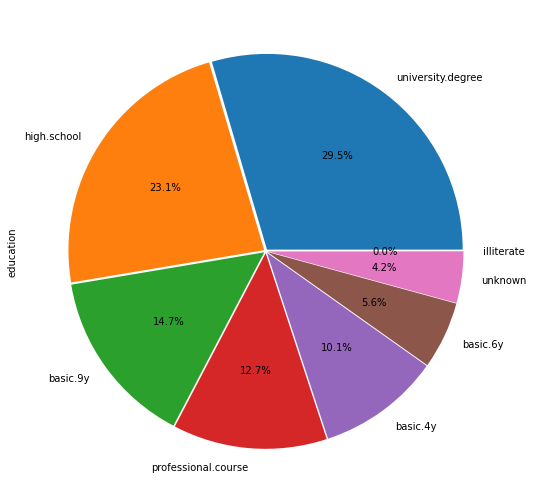

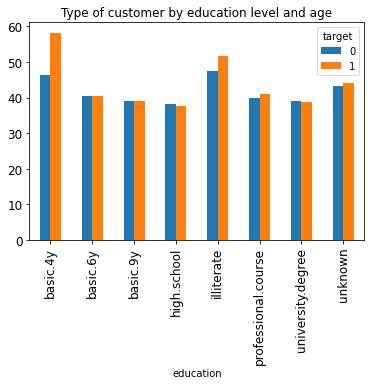

In [27]:
print("Variable: 'education'")
print("Discription: Education level")
print(f"Type of variable: {df.education.dtype}")
print(f"Total observations: {df.education.shape[0]}")
print(f"Unique values: {df.education.nunique()}")
print(f"List of unique values: {df.education.unique()}")
print("")

# Graph "pie"
df['education'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(13,9), 
                                                explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=0);

# Number of observations by class
edu_obs = df.education.value_counts()
edu_o = pd.DataFrame(edu_obs)
edu_o.rename(columns={"education":"Freq abs"}, inplace=True)
edu_o_pc = (df.education.value_counts(normalize=True) * 100).round(decimals=2)
edu_obs_pc = pd.DataFrame(edu_o_pc)
edu_obs_pc.rename(columns={"education":"percent %"}, inplace=True)
edu_obs = pd.concat([edu_o,edu_obs_pc], axis=1)
display(edu_obs)

# Graph: Type of customer by education level and age
# Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="education",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["education"], 
                       ascending=True).plot(kind="bar",
                                             title=("Type of customer by education level and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

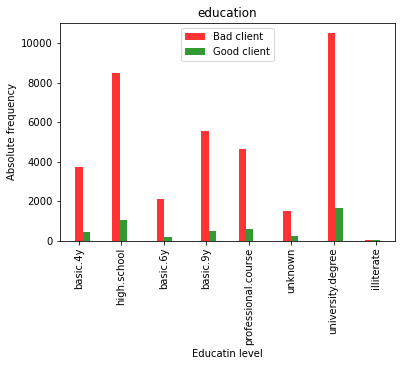

In [28]:
# Graph 'education' vs. 'target'
education_0 = df[df.target == 0].iloc[:,3:4]
education_1 = df[df.target == 1].iloc[:,3:4]

a = np.array(education_0)
b = np.array(education_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper center')
plt.title('education', fontsize=12)
plt.xlabel('Educatin level')
plt.xticks(rotation='vertical')
plt.ylabel('Absolute frequency')
plt.show()

# Variable: default

Variable: 'default'
Discription: has credit in default?
Type of variable: object
Total observations: 41188
Unique values: 3
List of unique values: ['no' 'unknown' 'yes']



,Freq abs,percent %
no,32588,79.12
unknown,8597,20.87
yes,3,0.01


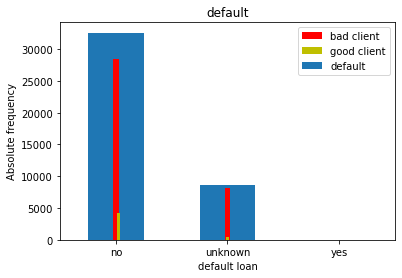

In [29]:
print("Variable: 'default'")
print("Discription: has credit in default?")
print(f"Type of variable: {df.default.dtype}")
print(f"Total observations: {df.default.shape[0]}")
print(f"Unique values: {df.default.nunique()}")
print(f"List of unique values: {df.default.unique()}")
print("")

# Graph "bar"
df['default'].value_counts(dropna=False).plot(kind='bar', figsize=(6,4));

# Number of observations by class
default_obs = df.default.value_counts()
default_o = pd.DataFrame(default_obs)
default_o.rename(columns={"default":"Freq abs"}, inplace=True)
default_o_pc = (df.default.value_counts(normalize=True) * 100).round(decimals=2)
default_obs_pc = pd.DataFrame(default_o_pc)
default_obs_pc.rename(columns={"default":"percent %"}, inplace=True)
default_obs = pd.concat([default_o,default_obs_pc], axis=1)
display(default_obs)


# Graph 'default' vs. 'target'
default_0 = df[df.target == 0].iloc[:,4:5]
default_1 = df[df.target == 1].iloc[:,4:5]

a = np.array(default_0)
b = np.array(default_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 1, label='bad client', align="left")
plt.hist(b, bins=40, color="y", alpha = 1, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('default', fontsize=12)
plt.xlabel('default loan')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

# Variable: housing

Variable: 'housing'
Discription: has housing loan?
Type of variable: object
Total observations: 41188
Unique values: 3
List of unique values: ['no' 'yes' 'unknown']



,Freq abs,percent %
yes,21576,52.38
no,18622,45.21
unknown,990,2.40


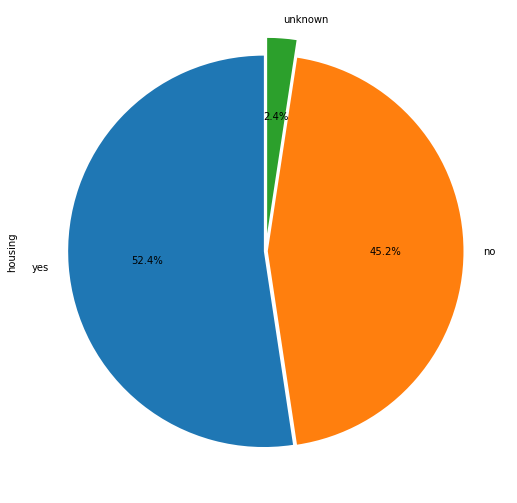

In [30]:
print("Variable: 'housing'")
print("Discription: has housing loan?")
print(f"Type of variable: {df.housing.dtype}")
print(f"Total observations: {df.housing.shape[0]}")
print(f"Unique values: {df.housing.nunique()}")
print(f"List of unique values: {df.housing.unique()}")
print("")

# Graph "pie"
df['housing'].value_counts(dropna=False).plot(kind='pie', 
                                              explode = (0.01, 0.01, 0.09), 
                                              figsize=(13,9), 
                                              autopct='%1.1f%%',
                                              startangle=90);

# Number of observations by class
hous_obs = df.housing.value_counts()
hous_o = pd.DataFrame(hous_obs)
hous_o.rename(columns={"housing":"Freq abs"}, inplace=True)
hous_o_pc = (df.housing.value_counts(normalize=True) * 100).round(decimals=2)
hous_obs_pc = pd.DataFrame(hous_o_pc)
hous_obs_pc.rename(columns={"housing":"percent %"}, inplace=True)
hous_obs = pd.concat([hous_o,hous_obs_pc], axis=1)
display(hous_obs)

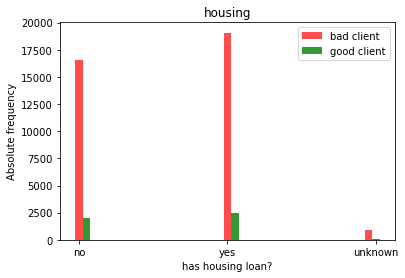

In [31]:
# Graph 'housing' vs. 'target'
housing_0 = df[df.target == 0].iloc[:,5:6]
housing_1 = df[df.target == 1].iloc[:,5:6]

a = np.array(housing_0)
b = np.array(housing_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.7, label='bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('housing', fontsize=12)
plt.xlabel('has housing loan?')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

# Variable: loan

Variable: 'loan'
Discription: has personal loan?
Type of variable: object
Total observations: 41188
Unique values: 3
List of unique values: ['no' 'yes' 'unknown']



,Freq abs,percent %
no,33950,82.43
yes,6248,15.17
unknown,990,2.40


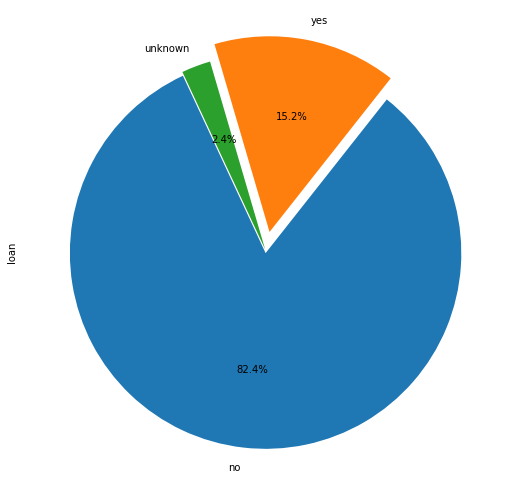

In [32]:
print("Variable: 'loan'")
print("Discription: has personal loan?")
print(f"Type of variable: {df.loan.dtype}")
print(f"Total observations: {df.loan.shape[0]}")
print(f"Unique values: {df.loan.nunique()}")
print(f"List of unique values: {df.loan.unique()}")
print("")

# Graph "pie"
df['loan'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(13,9), 
                                                explode = (0.01, 0.1, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=115);

# Number of observations by class
loan_obs = df.loan.value_counts()
loan_o = pd.DataFrame(loan_obs)
loan_o.rename(columns={"loan":"Freq abs"}, inplace=True)
loan_o_pc = (df.loan.value_counts(normalize=True) * 100).round(decimals=2)
loan_obs_pc = pd.DataFrame(loan_o_pc)
loan_obs_pc.rename(columns={"loan":"percent %"}, inplace=True)
loan_obs = pd.concat([loan_o,loan_obs_pc], axis=1)
display(loan_obs)

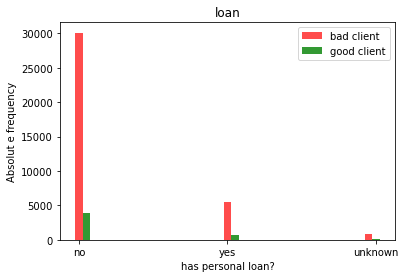

In [33]:
# Graph 'loan' vs. 'target'
loan_0 = df[df.target == 0].iloc[:,6:7]
loan_1 = df[df.target == 1].iloc[:,6:7]

a = np.array(loan_0)
b = np.array(loan_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.7, label='bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('loan', fontsize=12)
plt.xlabel('has personal loan?')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolut e frequency')
plt.show()

# Variable: poutcome

Variable: 'poutcome'
Discription: outcome of the previous marketing campaign
Type of variable: object
Total observations: 41188
Unique values: 3
List of unique values: ['nonexistent' 'failure' 'success']



,Freq abs,percent %
nonexistent,35563,86.34
failure,4252,10.32
success,1373,3.33


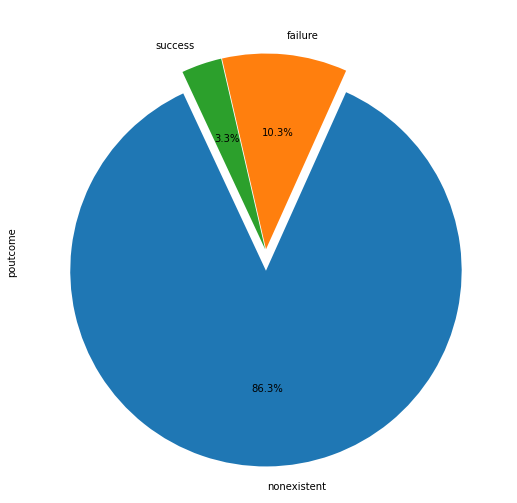

In [34]:
print("Variable: 'poutcome'")
print("Discription: outcome of the previous marketing campaign")
print(f"Type of variable: {df.poutcome.dtype}")
print(f"Total observations: {df.poutcome.shape[0]}")
print(f"Unique values: {df.poutcome.nunique()}")
print(f"List of unique values: {df.poutcome.unique()}")
print("")

# Graph "pie"
df['poutcome'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(13,9), 
                                                explode = (0.1, 0.01, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=115);

# Number of observations by class
pout_obs = df.poutcome.value_counts()
pout_o = pd.DataFrame(pout_obs)
pout_o.rename(columns={"poutcome":"Freq abs"}, inplace=True)
pout_o_pc = (df.poutcome.value_counts(normalize=True) * 100).round(decimals=2)
pout_obs_pc = pd.DataFrame(pout_o_pc)
pout_obs_pc.rename(columns={"poutcome":"percent %"}, inplace=True)
pout_obs = pd.concat([pout_o,pout_obs_pc], axis=1)
pout_obs

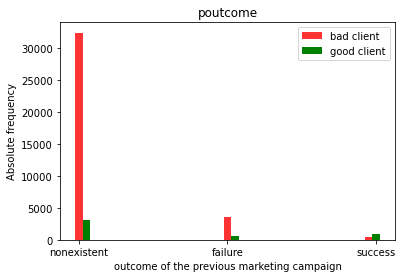

In [35]:
# Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="poutcome",
    values="age", aggfunc=np.mean)

# Graph 'default' vs. 'target'
pout_0 = df[df.target == 0].iloc[:,9:10]
pout_1 = df[df.target == 1].iloc[:,9:10]

a = np.array(pout_0)
b = np.array(pout_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 1, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('poutcome', fontsize=12)
plt.xlabel('outcome of the previous marketing campaign')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

# Setting-up numeric (df_num) and categoric (df_cat) dataframes

In [36]:
# Numeric dataframe
df_num = df.copy()
df_num = df.select_dtypes(include=["float64","int64"])

In [37]:
# Categoric dataframe
df_cat = df.copy()
df_cat = df.select_dtypes(exclude=["float64","int64"])

# Correlations

# Numeric variables (df_num)

In [38]:
# Subdivision of target
ynum = df_num.target
Xnum = df_num.drop(["target"], axis= "columns")

In [39]:
# Identifying variables with predictive power (Pearson Correlation p-value)
pd.DataFrame(
    [scipy.stats.pearsonr(Xnum[col], ynum) for col in Xnum.columns],
    columns=["Pearson Corr.", "p-value"],
    index=Xnum.columns,
).round(2)

,Pearson Corr.,p-value
age,0.03,0.0
pdays,-0.32,0.0
previous,0.23,0.0
emp_var_rate,-0.30,0.0
cons_price_idx,-0.14,0.0
cons_conf_idx,0.05,0.0
euribor3m,-0.31,0.0
nr_employed,-0.35,0.0


All variables have predictive power.

# Strategy: No transformation.

In [40]:
# Numeric variables with higher monotonicity (spearman)
df_spearman = df_num.copy()
df_spearman.drop(["target"], axis=1, inplace=True)

The numeric 10 most correlated pairs, Spearman method:


,X,Y,r
0,emp_var_rate,nr_employed,0.944702
1,emp_var_rate,euribor3m,0.939915
2,euribor3m,nr_employed,0.928857
3,emp_var_rate,cons_price_idx,0.664890
4,cons_price_idx,euribor3m,0.490970
5,previous,cons_price_idx,-0.282720
6,previous,emp_var_rate,-0.435293
7,previous,nr_employed,-0.438721
8,previous,euribor3m,-0.454724
9,pdays,previous,-0.509583


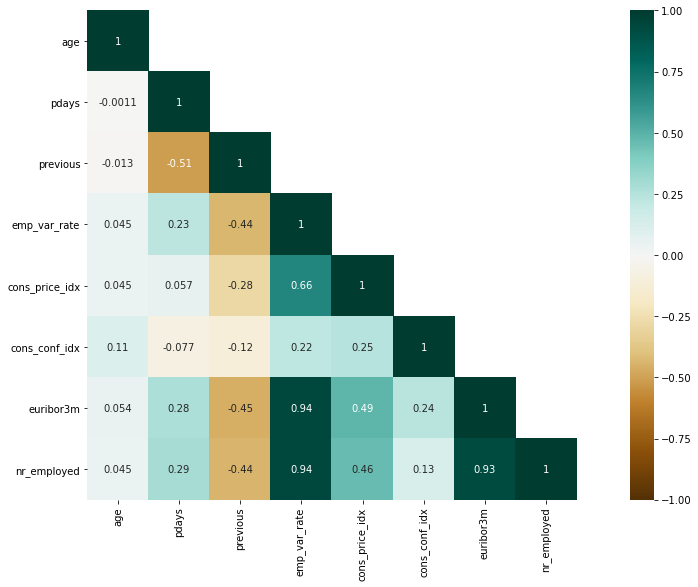

In [41]:
print("The numeric 10 most correlated pairs, Spearman method:")
spearman_rank = pg.pairwise_corr(df_spearman, method='spearman').loc[:,['X','Y','r']]
pos = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[:5,:]
neg = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[-5:,:]
con = pd.concat([pos,neg], axis=0)
display(con.reset_index(drop=True))

mask = np.triu(df_spearman.corr(method='spearman'), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(df_spearman.corr(method='spearman'), annot=True, 
            vmax=1, vmin = -1, square=True, cmap='BrBG', mask=mask);

In [42]:
# The numeric most correlated with the target (Pearson)
pearson = df_num.corr()
corr_target = pearson.target
display(corr_target.sort_values(ascending=False))
print("")
print("Ordered by rank in absolute values")
display(corr_target.abs().sort_values(ascending=False))

target            1.000000
previous          0.230181
cons_conf_idx     0.054878
age               0.030399
cons_price_idx   -0.136211
emp_var_rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr_employed      -0.354678
Name: target, dtype: float64


Ordered by rank in absolute values


target            1.000000
nr_employed       0.354678
pdays             0.324914
euribor3m         0.307771
emp_var_rate      0.298334
previous          0.230181
cons_price_idx    0.136211
cons_conf_idx     0.054878
age               0.030399
Name: target, dtype: float64

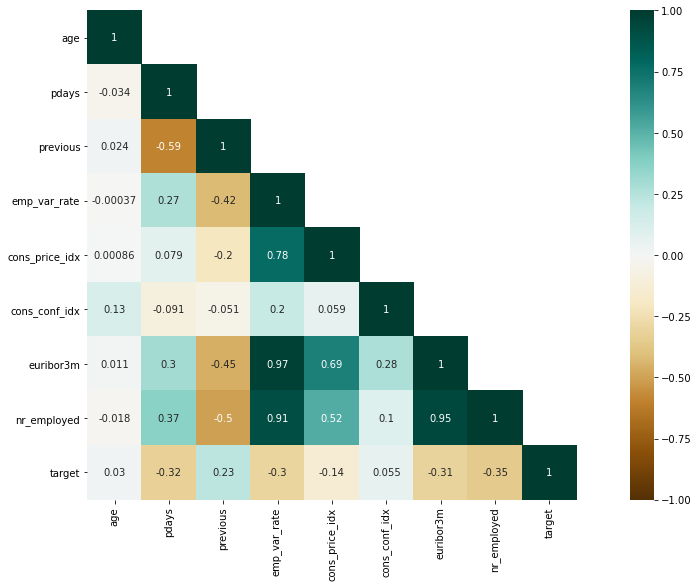

In [43]:
# Heatmap visualization: Pearson
mask = np.triu(df_num.corr(method="pearson"), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(df_num.corr(method="pearson"), annot=True, 
            vmax=1, vmin = -1, square=True, cmap='BrBG', mask=mask);

Variables 'emp_var_rate', 'nr_employed', 'euribor3m' are very redundant. 'nr_employed' is the most correlated with the target.

Strategy: Keep all variables (at least for now).

# Categoric variables (df_cat_t)

In [44]:
# Creating categoric subset in order to see correlations results
Xcat = df_cat.select_dtypes(exclude=['int64','float64']).copy()
ycat = df.target

In [45]:
# Statistic values and meaning results for each categoric variable
for col in Xcat.columns:
    table = pd.crosstab(Xcat[col], ycat)
    print()
    display(table)
    _, pval, _, expected_table = scipy.stats.chi2_contingency(table)
    print(f"p-value: {pval:.3f}")

target,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


p-value: 0.000



target,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


p-value: 0.000



target,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


p-value: 0.000



target,0,1
default,,
no,28391,4197
unknown,8154,443
yes,3,0


p-value: 0.000



target,0,1
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


p-value: 0.058



target,0,1
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


p-value: 0.579



target,0,1
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


p-value: 0.000


Strategy: Remove variables 'housing', 'loan' (p-value > 0.05) and 'default' (totaly unbalanced).

Comments: The 'yes' class of the 'default' variable is meaningless and any imputation to the missing values would deeply compromise its meaning, the more effective it will be to sacrifice the variable. The 'education' variable's classes have an order which means that it will be encoded by that same order. To the variables 'job', 'marital' and 'poutcome' will be applied a Binary Encoding and One Hot Encoding and will be evaluated concerning the best trade-off between dimensionality and information gain.

Strategy2: Remove variables 'loan' (p-value > 0.05) and 'default' (totaly embalanced). 'housing' it's beyond limits but i'm still going to keep it for now, I will encode it and test it again.

# Outliers, Missing Values, Anomalies e Transformations

# Numeric variables (df_num)

In [46]:
# Removing Target and making a copy
df_drop = df_num.drop(["target"], axis=1).copy()

,age,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
mean,40.02406,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
50%,38.00000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
std,10.42125,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528


Any missing values: False



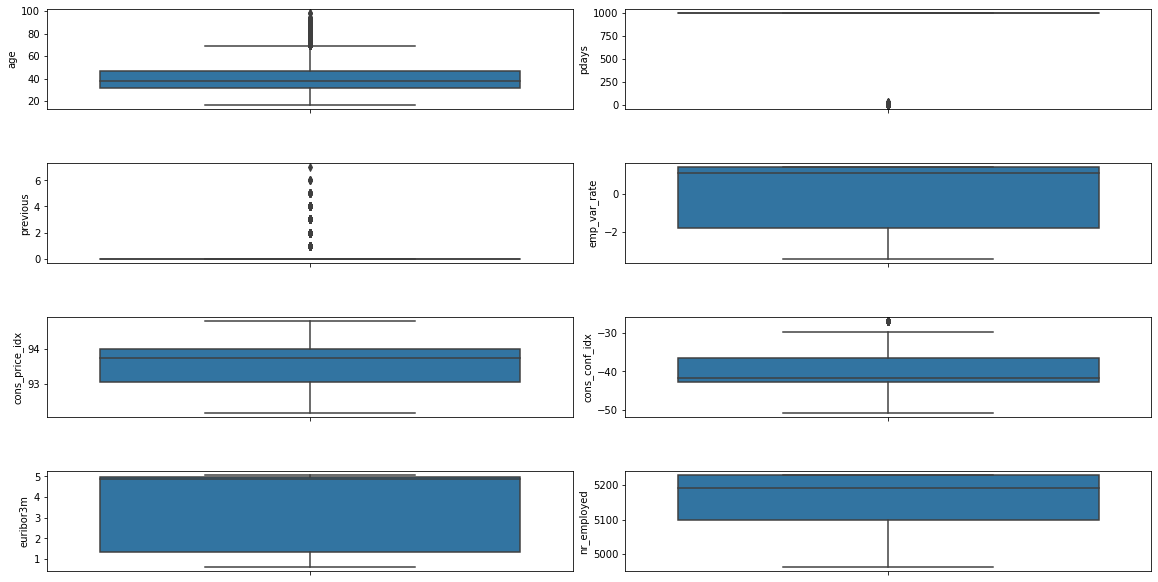

In [47]:
# Visualization of numerical data dispersion (Boxplot)
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(16, 8))
index = 0
axs = axs.flatten()
for k,v in df_drop.items():
    sns.boxplot(y=k, data=df_drop, ax=axs[index], orient="h")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

display(df_drop.describe().loc[["mean","50%","std"]])
print(f"Any missing values: {df_drop.isnull().values.any()}")
print("")

From the analysis of the dispersion of the numeric data, it seems to be no outliers. The scattered data of 'age' has a normal behavior and I assume that the extreme datapoints in the variable 'pdays' are 'out of range' values, as for the rest every variables seem to have a balanced body.

Regarding missing values and other anomalies, all numerical variables were analyzed for their unique values and respective counts and there seems to be no missing values or any other anomalies.

Next, categorical variables will be analyzed.

# Categoric veriables (df_cat_t)

# Anomalies treatment and transformation into numerics through various techniques that will be analyzed case by case¶

In [48]:
# Creating a copy
df_cat_t = df_cat.copy()
df_cat.describe() # Describing the categorical dataframe

,job,marital,education,default,housing,loan,poutcome
count,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,3
top,admin.,married,university.degree,no,yes,no,nonexistent
freq,10422,24928,12168,32588,21576,33950,35563


# Variable: job

In [49]:
print(f"Unique values: {df_cat.job.nunique()}")
print("")

# Observations by class
num_obs = df_cat.job.value_counts()
num_o = pd.DataFrame(num_obs)
num_o.rename(columns={"job":"Freq abs"}, inplace=True)
num_o_pc = (df_cat.job.value_counts(normalize=True) * 100).round(decimals=2)
num_obs_pc = pd.DataFrame(num_o_pc)
num_obs_pc.rename(columns={"job":"percent %"}, inplace=True)
n_obs = pd.concat([num_o,num_obs_pc], axis=1)
display(n_obs)

Unique values: 12



,Freq abs,percent %
admin.,10422,25.30
blue-collar,9254,22.47
technician,6743,16.37
services,3969,9.64
management,2924,7.10
retired,1720,4.18
entrepreneur,1456,3.54
self-employed,1421,3.45
housemaid,1060,2.57
unemployed,1014,2.46


In this case, 'unknown' are interpreted as missing values.

# Strategy: Replacing by the most frequent value.

Unique values: 11


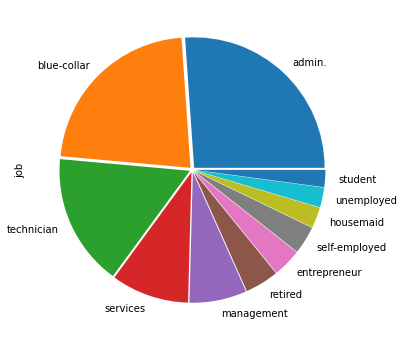

In [50]:
# Replacing 'unknown' by NaN
df_cat_t.job.replace(to_replace="unknown", value=np.nan, inplace=True)

# Imputation missing values by the modal value
df_cat_t['job'] = df_cat_t.job.fillna(df_cat_t.job.value_counts().index[0])

# Confirming and visualizing of "job"
df_cat_t.job.value_counts(dropna=False).plot(kind='pie', figsize=(10,6), 
                                           explode=(0.02, 0.02, 0.02, 0.02, 
                                                    0.02, 0.02, 0.02, 0.02,
                                                    0.02, 0.02, 0.02));
print(f"Unique values: {df_cat_t.job.nunique()}")

Encoded by dummies method and numeric tranformation

In [52]:
# Encoding 'job' OHE
df_job = df_cat_t.job
job_ohe = pd.get_dummies(df_job)
binary_encoder_job = BinaryEncoder() 
job_bin = binary_encoder_job.fit_transform(df_job)
print(f'''
*Results*
job OHE: {job_ohe.shape[1]} columns''')

NameError: name 'BinaryEncoder' is not defined

In [53]:
# Removing 'job' and concatenation job_ohe
df_cat_t.drop(["job"],axis=1,inplace=True)
df_cat_t = pd.concat([df_cat_t,job_ohe],axis=1)
display(df_cat_t.head(2))
display(df_cat_t.shape)

,marital,education,default,housing,loan,poutcome,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,married,basic.4y,no,no,no,nonexistent,0,0,0,1,0,0,0,0,0,0,0
1,married,high.school,unknown,no,no,nonexistent,0,0,0,0,0,0,0,1,0,0,0


(41188, 17)

# Variable: Marital

In [54]:
print(f"Unique values: {df_cat.marital.nunique()}")
print("")

# Observations by class
marital_obs = df_cat.marital.value_counts()
marital_o = pd.DataFrame(marital_obs)
marital_o.rename(columns={"marital":"Freq abs"}, inplace=True)
marital_o_pc = (df_cat.marital.value_counts(normalize=True) * 100).round(decimals=2)
marital_obs_pc = pd.DataFrame(marital_o_pc)
marital_obs_pc.rename(columns={"marital":"percent %"}, inplace=True)
marital_obs = pd.concat([marital_o,marital_obs_pc], axis=1)
display(marital_obs)

Unique values: 4



,Freq abs,percent %
married,24928,60.52
single,11568,28.09
divorced,4612,11.20
unknown,80,0.19


In this case, 'unknown' are interpreted as missing values.

# Strategy: Replacing by the most frequent value.

Unique values: 3



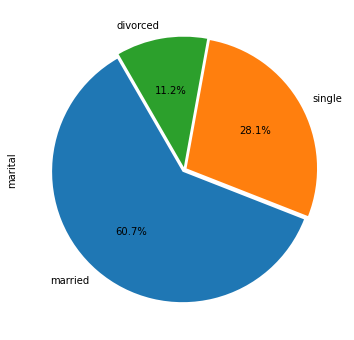

In [55]:
# Replacing 'unknown' by NaN
df_cat_t.marital.replace(to_replace="unknown", value=np.nan, inplace=True)

# Imputation of missing values by modal value
df_cat_t['marital'] = df_cat_t.marital.fillna(df_cat_t.marital.value_counts().index[0])

# Graph "pie"
df_cat_t['marital'].value_counts(dropna=False).plot(kind='pie', figsize=(10,6),
                                              explode = (0.02, 0.02, 0.02),
                                              autopct='%1.1f%%',
                                              startangle=120);
print(f"Unique values: {df_cat_t.marital.nunique()}")
print("")

Encoded by dummies method and numeric tranformation

In [56]:
# marital
df_marital = df_cat_t.marital
marital_ohe = pd.get_dummies(df_marital)
binary_encoder_marital = BinaryEncoder()
marital_bin = binary_encoder_marital.fit_transform(df_marital)
print(f'''
*Results*
marital OHE: {marital_ohe.shape[1]} columns''')

NameError: name 'BinaryEncoder' is not defined

In [57]:
df_cat_t.drop(["marital"],axis=1,inplace=True)
df_cat_t = pd.concat([df_cat_t,marital_ohe],axis=1)
display(df_cat_t.head(2))
display(df_cat_t.shape)

,education,default,housing,loan,poutcome,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,basic.4y,no,no,no,nonexistent,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,high.school,unknown,no,no,nonexistent,0,0,0,0,0,0,0,1,0,0,0,0,1,0


(41188, 19)

# Variable: education 

In [58]:
print(f"Unique values: {df_cat.education.nunique()}")
print("")

# Observations by class
edu_obs = df_cat.education.value_counts()
edu_o = pd.DataFrame(edu_obs)
edu_o.rename(columns={"education":"Freq abs"}, inplace=True)
edu_o_pc = (df_cat.education.value_counts(normalize=True) * 100).round(decimals=2)
edu_obs_pc = pd.DataFrame(edu_o_pc)
edu_obs_pc.rename(columns={"education":"percent %"}, inplace=True)
edu_obs = pd.concat([edu_o,edu_obs_pc], axis=1)
display(edu_obs)

Unique values: 8



,Freq abs,percent %
university.degree,12168,29.54
high.school,9515,23.10
basic.9y,6045,14.68
professional.course,5243,12.73
basic.4y,4176,10.14
basic.6y,2292,5.56
unknown,1731,4.20
illiterate,18,0.04


In this case, 'unknown' are interpreted as missing values.

# Strategy: Replacing by the most frequent value.

Unique values: 7



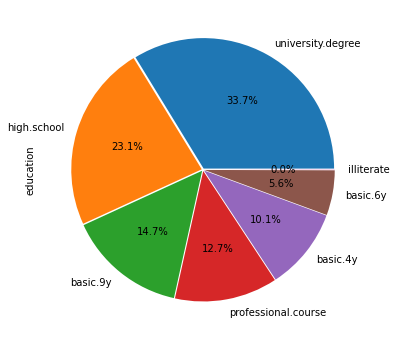

In [59]:
# Replacing 'unknown' by NaN
df_cat_t.education.replace(to_replace="unknown", value=np.nan, inplace=True)

# Imputation of missing values by modal value
df_cat_t['education'] = df_cat_t.education.fillna(df_cat_t.education.value_counts().index[0])

# Graph "pie"
df_cat_t['education'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(10,6), 
                                                explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=0);
print(f"Unique values: {df_cat_t.education.nunique()}")
print("")

In [60]:
df_cat_t.education.value_counts()

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

Encoded accordingly with a specific order. It will be automatic converted into numeric.

In [61]:
df_cat_t["education"] = df_cat_t.education.map({"university.degree":7, 
                                                "professional.course":6,
                                                "high.school":5,"basic.9y":4,
                                                "basic.6y":3, "basic.4y":2,
                                                "illiterate":1 })
display(df_cat_t.education.value_counts())
display(df_cat_t.head(2))
display(df_cat_t.shape)

7    13899
5     9515
4     6045
6     5243
2     4176
3     2292
1       18
Name: education, dtype: int64

,education,default,housing,loan,poutcome,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,2,no,no,no,nonexistent,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,5,unknown,no,no,nonexistent,0,0,0,0,0,0,0,1,0,0,0,0,1,0


(41188, 19)

# Variable: default 

Unique values: 3



,Freq abs,percent %
no,32588,79.12
unknown,8597,20.87
yes,3,0.01


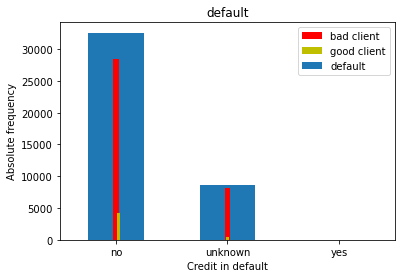

In [62]:
print(f"Unique values: {df.default.nunique()}")
print("")

# Visualizing graph "bar"
df['default'].value_counts(dropna=False).plot(kind='bar', figsize=(6,4));

# Number of observations by class
default_obs = df.default.value_counts()
default_o = pd.DataFrame(default_obs)
default_o.rename(columns={"default":"Freq abs"}, inplace=True)
default_o_pc = (df.default.value_counts(normalize=True) * 100).round(decimals=2)
default_obs_pc = pd.DataFrame(default_o_pc)
default_obs_pc.rename(columns={"default":"percent %"}, inplace=True)
default_obs = pd.concat([default_o,default_obs_pc], axis=1)
display(default_obs)


# Graph 'default' vs. 'target'
default_0 = df[df.target == 0].iloc[:,4:5]
default_1 = df[df.target == 1].iloc[:,4:5]

a = np.array(default_0)
b = np.array(default_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 1, label='bad client', align="left")
plt.hist(b, bins=40, color="y", alpha = 1, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('default', fontsize=12)
plt.xlabel('Credit in default')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

In this case, 'unknown' are interpreted as missing values. The 'yes' class is meaningless and any imputation to the missing values would deeply compromise its meaning.

# Strategy: Remove variable.

In [63]:
df_cat_t.drop(["default"], axis=1, inplace=True)
display(df_cat_t.head(2))
display(df_cat_t.shape)

,education,housing,loan,poutcome,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,2,no,no,nonexistent,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,5,no,no,nonexistent,0,0,0,0,0,0,0,1,0,0,0,0,1,0


(41188, 18)

# Variable: housing

In [64]:
print(f"Unique values: {df_cat.housing.nunique()}")
print("")

# Observations by class
hous_obs = df_cat.housing.value_counts()
hous_o = pd.DataFrame(hous_obs)
hous_o.rename(columns={"housing":"Freq abs"}, inplace=True)
hous_o_pc = (df_cat.housing.value_counts(normalize=True) * 100).round(decimals=2)
hous_obs_pc = pd.DataFrame(hous_o_pc)
hous_obs_pc.rename(columns={"housing":"percent %"}, inplace=True)
hous_obs = pd.concat([hous_o,hous_obs_pc], axis=1)
display(hous_obs)

Unique values: 3



,Freq abs,percent %
yes,21576,52.38
no,18622,45.21
unknown,990,2.40


In this case, 'unknown' are interpreted as missing values.

# Strategy: Replacing by the most frequent value.

Unique values: 2



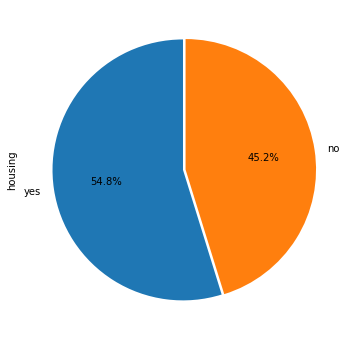

In [65]:
# Replacing 'unknown' by NaN
df_cat_t.housing.replace(to_replace="unknown", value=np.nan, inplace=True)

# Imputation of missing values by modal value
df_cat_t['housing'] = df_cat_t.housing.fillna(df_cat_t.housing.value_counts().index[0])

# Visualizing "pie" graph
df_cat_t['housing'].value_counts(dropna=False).plot(kind='pie', 
                                              explode = (0.01, 0.01), 
                                              figsize=(10,6), 
                                              autopct='%1.1f%%',
                                              startangle=90);
print(f"Unique values: {df_cat_t.housing.nunique()}")
print("")

For the Chi-square test, this variable has revealed has with little statistic importance.

# Strategy: Remove variable.

In [66]:
df_cat_t.drop(["housing"], axis=1, inplace=True)
display(df_cat_t.head(2))
display(df_cat_t.shape)

,education,loan,poutcome,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,2,no,nonexistent,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,5,no,nonexistent,0,0,0,0,0,0,0,1,0,0,0,0,1,0


(41188, 17)

# Variable: loan

In [67]:
print(f"Unique values: {df_cat.loan.nunique()}")
print("")

# Observations by class
loan_obs = df_cat.loan.value_counts()
loan_o = pd.DataFrame(loan_obs)
loan_o.rename(columns={"loan":"Freq abs"}, inplace=True)
loan_o_pc = (df_cat.loan.value_counts(normalize=True) * 100).round(decimals=2)
loan_obs_pc = pd.DataFrame(loan_o_pc)
loan_obs_pc.rename(columns={"loan":"percent %"}, inplace=True)
loan_obs = pd.concat([loan_o,loan_obs_pc], axis=1)
display(loan_obs)

Unique values: 3



,Freq abs,percent %
no,33950,82.43
yes,6248,15.17
unknown,990,2.40


In this case, 'unknown' are interpreted as missing values.

# Strategy: Replacing by the most frequent value

Unique values: 2



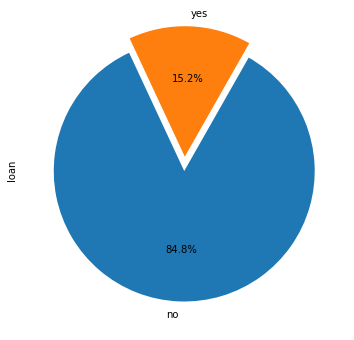

In [68]:
# Replacing 'unknown' by NaN
df_cat_t.loan.replace(to_replace="unknown", value=np.nan, inplace=True)

# Imputation of missing values by modal value
df_cat_t['loan'] = df_cat_t.loan.fillna(df_cat_t.loan.value_counts().index[0])

# Visualizing "pie" graph
df_cat_t['loan'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(10,6), 
                                                explode = (0.01, 0.1),
                                                autopct='%1.1f%%',
                                                startangle=115);
print(f"Unique values: {df_cat_t.loan.nunique()}")
print("")

For the Chi-square test, this variable has revealed has with little statistic importance.

# Strategy: Remove variable

In [69]:
df_cat_t.drop(["loan"], axis=1, inplace=True)
display(df_cat_t.head(2))
display(df_cat_t.shape)

,education,poutcome,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,2,nonexistent,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,5,nonexistent,0,0,0,0,0,0,0,1,0,0,0,0,1,0


(41188, 16)

# Variable: poutcome

Unique values: 3



,Freq abs,percent %
nonexistent,35563,86.34
failure,4252,10.32
success,1373,3.33


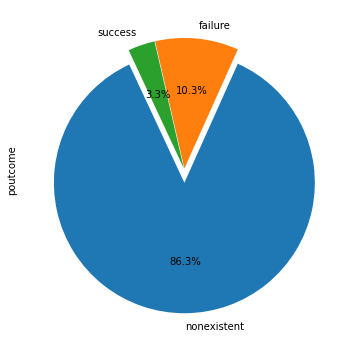

In [70]:
print(f"Unique values: {df_cat.poutcome.nunique()}")
print("")

# Graph "pie"
df['poutcome'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(10,6), 
                                                explode = (0.1, 0.01, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=115);

# Number of observation by class
pout_obs = df.poutcome.value_counts()
pout_o = pd.DataFrame(pout_obs)
pout_o.rename(columns={"poutcome":"Freq abs"}, inplace=True)
pout_o_pc = (df.poutcome.value_counts(normalize=True) * 100).round(decimals=2)
pout_obs_pc = pd.DataFrame(pout_o_pc)
pout_obs_pc.rename(columns={"poutcome":"percent %"}, inplace=True)
pout_obs = pd.concat([pout_o,pout_obs_pc], axis=1)
pout_obs

In this case, 'nonexistent' values are interpreted has relevant values.

# Strategy: No transformation.

# Encoded by dummies method and numeric tranformation

In [71]:
# Encoding 'poutcome' OHE
df_poutcome = df_cat_t.poutcome
poutcome_ohe = pd.get_dummies(df_poutcome)
binary_encoder_poutcome = BinaryEncoder()
poutcome_bin = binary_encoder_poutcome.fit_transform(df_poutcome)
print(f'''
*Results*
poutcome OHE: {poutcome_ohe.shape[1]} columns''')

NameError: name 'BinaryEncoder' is not defined

In [72]:
# Remove 'poutcome' and concatenation poutcome_ohe
df_cat_t.drop(["poutcome"],axis=1,inplace=True)
df_cat_t = pd.concat([df_cat_t,poutcome_ohe],axis=1)
display(df_cat_t.head(2))
display(df_cat_t.shape)

,education,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,failure,nonexistent,success
0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


(41188, 18)

In [73]:
df_cat_t.dtypes

education        int64
admin.           uint8
blue-collar      uint8
entrepreneur     uint8
housemaid        uint8
management       uint8
retired          uint8
self-employed    uint8
services         uint8
student          uint8
technician       uint8
unemployed       uint8
divorced         uint8
married          uint8
single           uint8
failure          uint8
nonexistent      uint8
success          uint8
dtype: object

In [74]:
# Analysis of the transformed dataset
display(df_cat_t.dtypes)
print("")
print(f"df_cat (original): ........ {df_cat.shape}")
print(f"df_cat_t (transformed): ... {df_cat_t.shape}")

education        int64
admin.           uint8
blue-collar      uint8
entrepreneur     uint8
housemaid        uint8
management       uint8
retired          uint8
self-employed    uint8
services         uint8
student          uint8
technician       uint8
unemployed       uint8
divorced         uint8
married          uint8
single           uint8
failure          uint8
nonexistent      uint8
success          uint8
dtype: object


df_cat (original): ........ (41188, 7)
df_cat_t (transformed): ... (41188, 18)


In [75]:
# Concatenation of both numeric and categorical datasets
df_numcat = pd.concat([df_cat_t,df_num], axis=1)

# Removing any NaNs or anomalies just to make sure
df_numcat.dropna(how="any", axis=0)

,education,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,...,success,age,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
0,2,0,0,0,1,0,0,0,0,0,...,0,56,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,5,0,0,0,0,0,0,0,1,0,...,0,57,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,5,0,0,0,0,0,0,0,1,0,...,0,37,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,40,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,5,0,0,0,0,0,0,0,1,0,...,0,56,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,6,0,0,0,0,0,1,0,0,0,...,0,73,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,6,0,1,0,0,0,0,0,0,0,...,0,46,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,7,0,0,0,0,0,1,0,0,0,...,0,56,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,6,0,0,0,0,0,0,0,0,0,...,0,44,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [76]:
# Subdivision of the target
y_numcat = df_numcat.target
X_numcat = df_numcat.drop(["target"], axis= "columns")

In [77]:
# Identifying all variables with great predictive power (Pearson Correlation p-value)
dataframe = pd.DataFrame(
    [scipy.stats.pearsonr(X_numcat[col], y_numcat) for col in X_numcat.columns],
    columns=["Pearson Corr.", "p-value"],
    index=X_numcat.columns,
).round(2).sort_values(by="p-value", ascending=False)

display(dataframe)

,Pearson Corr.,p-value
management,-0.00,0.93
self-employed,-0.00,0.34
technician,-0.01,0.21
housemaid,-0.01,0.19
divorced,-0.01,0.03
education,0.06,0.00
nonexistent,-0.19,0.00
euribor3m,-0.31,0.00
cons_conf_idx,0.05,0.00
cons_price_idx,-0.14,0.00


In [78]:
# Identifying columns in which p-value > 0.05
column = []
for item in dataframe.index:
    if dataframe['p-value'][item] > 0.05 or dataframe['p-value'][item] == 'NaN':
        column.append(item)

In [79]:
# Removing statistically non significant columns
df_numcat.drop(column, axis=1, inplace=True)

In [80]:
df_numcat.shape

(41188, 23)

# Determine the baseline

Clients definition:
TP = Good candidates identified as good candidates
TN = Bad candidates identified as bad candidates
FP = Bad candidates identified as good candidates¶
FN = Good candidates identified as bad candidates
Real scenario:
Clients who has subscribed the term deposit: ......... 4.640
Clients who hasn't subscribed the term deposit: ... 36.548

In [81]:
# Dividing the numeric dataset (df_num) in train (80%) and test (20%)
train_set, test_set = train_test_split(df_numcat, test_size = 0.2, random_state = seed)

X_train = train_set.drop(['target'], axis = 'columns')
y_train = train_set['target']

X_test = test_set.drop(['target'], axis = 1)
y_test = test_set['target']

# Assuming all bad customers

In [82]:
y_preds_all_bad = np.zeros(y_test.shape)
y_preds_all_bad

array([0., 0., 0., ..., 0., 0., 0.])

In [83]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_bad).ravel()

print(f'''
Number of True Negatives: {tn}
Number of True Positives: {tp}
Number of False Negatives: {fn}
Number of False Positives: {fp}
''')

print(confusion_matrix(y_test, y_preds_all_bad))

baseline_all_bad = fp*500+fn*2000
print(f'''
BANK TOTAL COSTS: {fp*500+fn*2000} € 
(Scenario: if all clients where considered to be bad candidates but subscribed the bank deposit.)
''')


Number of True Negatives: 7303
Number of True Positives: 0
Number of False Negatives: 935
Number of False Positives: 0

[[7303    0]
 [ 935    0]]

BANK TOTAL COSTS: 1870000 € 
(Scenario: if all clients where considered to be bad candidates but subscribed the bank deposit.)



# Assuming all good customers

In [84]:
y_preds_all_good = np.ones(y_test.shape)
y_preds_all_good

array([1., 1., 1., ..., 1., 1., 1.])

In [85]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_good).ravel()

print("")
print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)
print("")
print(confusion_matrix(y_test, y_preds_all_good))

baseline_all_good = fp*500+fn*2000
print(f'''
BANK TOTAL COST: {fp*500+fn*2000} €
(Scenario: if all clients where considered to be good candidates but didn't subscribe the deposit.
''')


Number of True Negatives: 0
Number of True Positives: 935
Number of False Negatives: 0
Number of False Positives: 7303

[[   0 7303]
 [   0  935]]

BANK TOTAL COST: 3651500 €
(Scenario: if all clients where considered to be good candidates but didn't subscribe the deposit.



# Cost funtions, Min-Threshold and ROC Curve: Area Under the Curve

In [86]:
# Cost functions

def total_cost(y_test, y_preds, threshold = 0.5):
    
    tn, fp, fn, tp = confusion_matrix(y_test == 1, y_preds > threshold).ravel()
    
    cost_fn = fn*2000
    cost_fp = fp*500
    
    return cost_fn + cost_fp

In [87]:
# Min-Threshold

def min_cost_threshold(y_test, y_preds):
    
    costs = {}
    
    for threshold in np.arange(0, 1.1, 0.1):
        
        costs[round(threshold, 1)] = total_cost(y_test, y_preds, threshold = threshold)    
        
    plt.plot(list(costs.keys()), list(costs.values()))    
    
    df_cost = pd.DataFrame(np.array([list(costs.keys())]).T)
    
    df_cost.columns =['Threshold']
    
    df_cost['Total_Cost'] = np.array([list(costs.values())]).T
    
    display(df_cost)    
    
    plt.ylabel('Cost')
    plt.xlabel('Threshold')
    plt.show()
    
    min_cost = df_cost['Total_Cost'].min()
    min_thres = df_cost.loc[df_cost['Total_Cost'] == min_cost, 'Threshold'].iloc[0]
    
    print('Threshold_min_cost:', min_thres)

In [89]:
# ROC Curve: Area Under the Curve

def auc_roc_plot(y_test, y_preds):

    fpr, tpr, thresholds = roc_curve(y_test,y_preds)
    roc_auc = auc(fpr, tpr)
    
    print(roc_auc)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Modeling

# Logistic Regression (LR)

In [90]:
# Making a copy of the dataset (df_num)
df_rl = df_numcat.copy()

In [91]:
# Dividing the dataset in train (80%) and test (20%)
train_set_rl, test_set_rl = train_test_split(df_rl, test_size = 0.2, random_state = seed)

X_train_rl = train_set_rl.drop(['target'], axis = 1)
y_train_rl = train_set_rl['target']

X_test_rl = test_set_rl.drop(['target'], axis = 1)
y_test_rl = test_set_rl['target']

In [92]:
# Normalization of the train and test data
scaler_rl = MinMaxScaler()
features_names = X_train_rl.columns

X_train_rl = scaler_rl.fit_transform(X_train_rl)
X_train_rl = pd.DataFrame(X_train_rl, columns = features_names)

X_test_rl = scaler_rl.transform(X_test_rl)
X_test_rl = pd.DataFrame(X_test_rl, columns = features_names)

In [93]:
%%time
lr = LogisticRegression(max_iter = 500, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )

parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train_rl, y_train_rl)

Wall time: 8.71 s


In [94]:
clf_lr

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', max_iter=500,
                                          random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [95]:
clf_lr.best_estimator_

LogisticRegression(C=100, class_weight='balanced', max_iter=500,
                   random_state=42)

In [96]:
clf_lr.best_estimator_.C

100

In [97]:
clf_lr.best_score_

0.7663732928679817

In [98]:
y_preds_rl = clf_lr.predict_proba(X_test_rl)[:,1]

total_cost(y_test_rl, y_preds_rl, threshold = 0.5)

1449500

0.7642046598680053


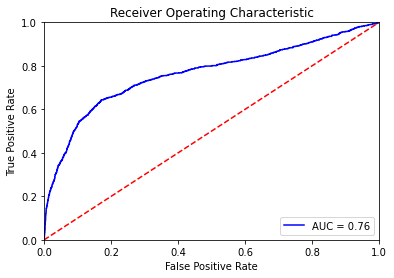

In [99]:
auc_roc_plot(y_test_rl, y_preds_rl)
aucroclr = float(76.42)

,Threshold,Total_Cost
0,0.0,3651500
1,0.1,3651500
2,0.2,3559000
3,0.3,2335500
4,0.4,1578000
5,0.5,1449500
6,0.6,1272500
7,0.7,1327000
8,0.8,1425500
9,0.9,1570000


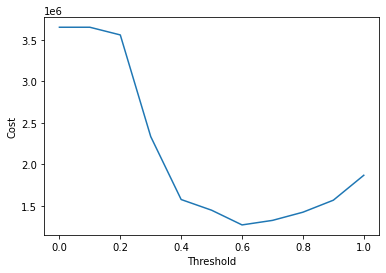

Threshold_min_cost: 0.6


In [100]:
min_cost_threshold(y_test_rl, y_preds_rl)

In [101]:
# Results
lr_cost = total_cost(y_test_rl, y_preds_rl, threshold = 0.6)
diff_lr = ((baseline_all_good-lr_cost)/baseline_all_good*100).round(decimals=2)

print(f'''
Total cost: .... {int(lr_cost)} € 
Difference: ...... {diff_lr.round(decimals=2)} % best performance in comparison to the baseline
''')


Total cost: .... 1272500 € 
Difference: ...... 65.15 % best performance in comparison to the baseline



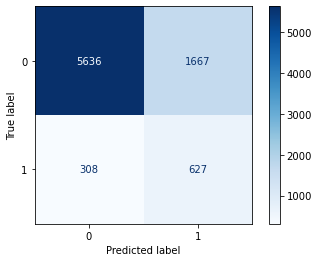

In [102]:
# Confusion Matrix display
plot_confusion_matrix(clf_lr, X_test_rl, y_test_rl, values_format=".4g", cmap="Blues");

# Creates assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test_rl == 1, y_preds_rl > 0.5).ravel()
tn_lr = tn
fp_lr = fp
fn_lr = fn
tp_lr = tp

# K-Nearest Neighbor

In [103]:
# Making a copy of the dataset
df_knn = df_numcat.copy()

In [104]:
# Dividing the dataset in train (80%) and test (20%)
train_set_knn, test_set_knn = train_test_split(df_knn, test_size = 0.2, random_state = seed)

X_train_knn = train_set_knn.drop(['target'], axis = 1)
y_train_knn = train_set_knn['target']

X_test_knn = test_set_knn.drop(['target'], axis = 1)
y_test_knn = test_set_knn['target']

In [105]:
# Normalizing train and test data
scaler_knn = MinMaxScaler()
features_names = X_train_knn.columns

X_train_knn = scaler_knn.fit_transform(X_train_knn)
X_train_knn = pd.DataFrame(X_train_knn, columns = features_names)

X_test_knn = scaler_knn.transform(X_test_knn)
X_test_knn = pd.DataFrame(X_test_knn, columns = features_names)

In [106]:
%%time
for k in range(1, 200, 5):
    k = k + 1
    
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn, y_train_knn)
    
    acc = knn.score(X_test_knn, y_test_knn)
    
    print('Accuracy for k =', k, ' is:', acc)

Accuracy for k = 2  is: 0.8896576839038601
Accuracy for k = 7  is: 0.891357125515902
Accuracy for k = 12  is: 0.8956057295460063
Accuracy for k = 17  is: 0.896091284292304
Accuracy for k = 22  is: 0.8963340616654528
Accuracy for k = 27  is: 0.8969410050983249
Accuracy for k = 32  is: 0.8975479485311969
Accuracy for k = 37  is: 0.8963340616654528
Accuracy for k = 42  is: 0.8963340616654528
Accuracy for k = 47  is: 0.8962126729788784
Accuracy for k = 52  is: 0.8973051711580481
Accuracy for k = 57  is: 0.8962126729788784
Accuracy for k = 62  is: 0.8962126729788784
Accuracy for k = 67  is: 0.8962126729788784
Accuracy for k = 72  is: 0.8958485069191552
Accuracy for k = 77  is: 0.8957271182325808
Accuracy for k = 82  is: 0.8958485069191552
Accuracy for k = 87  is: 0.8958485069191552
Accuracy for k = 92  is: 0.8958485069191552
Accuracy for k = 97  is: 0.8959698956057296
Accuracy for k = 102  is: 0.8956057295460063
Accuracy for k = 107  is: 0.8959698956057296
Accuracy for k = 112  is: 0.895727

In [107]:
%%time
knn = KNeighborsClassifier(n_neighbors = 32, weights='uniform').fit(X_train_knn, y_train_knn)

y_preds_knn = knn.predict(X_test_knn)

accuracy_score(y_test_knn, y_preds_knn)

Wall time: 8.41 s


0.8975479485311969

In [108]:
y_preds_knn = knn.predict_proba(X_test_knn)[:,1]

knn.score(X_test_knn, y_test_knn)

0.8975479485311969

0.7567812949187244


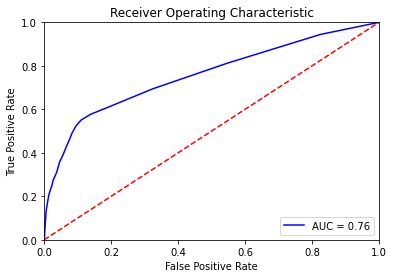

In [109]:
auc_roc_plot(y_test_knn, y_preds_knn)
aucrocknn = float(75.68)

In [110]:
total_cost(y_test_knn, y_preds_knn, threshold = 0.5)

1530500

,Threshold,Total_Cost
0,0.0,3116500
1,0.1,1431000
2,0.2,1237500
3,0.3,1310500
4,0.4,1425000
5,0.5,1530500
6,0.6,1601000
7,0.7,1702000
8,0.8,1813500
9,0.9,1864000


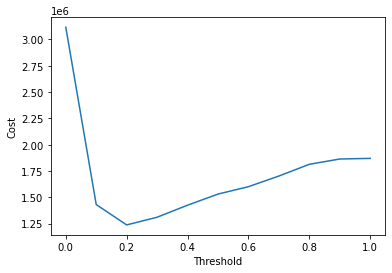

Threshold_min_cost: 0.2


In [111]:
min_cost_threshold(y_test_knn, y_preds_knn)

In [112]:
# Results
knn_cost = total_cost(y_test_knn, y_preds_knn, threshold = 0.2)
diff_knn = ((baseline_all_good-knn_cost)/baseline_all_good*100).round(decimals=2)

print(f'''
Total cost: .... {int(knn_cost)} € 
Difference: ...... {diff_knn.round(decimals=2)} % best performance in comparison to the baseline
''')


Total cost: .... 1237500 € 
Difference: ...... 66.11 % best performance in comparison to the baseline



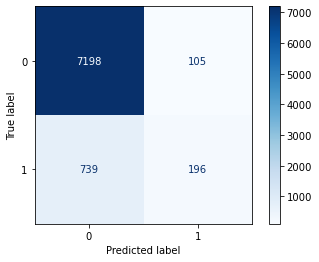

In [113]:
# Confusion Matrix display
plot_confusion_matrix(knn, X_test_knn, y_test_knn, values_format=".4g", cmap="Blues");

# Creates assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test_knn == 1, y_preds_knn > 0.5).ravel()
tn_knn = tn
fp_knn = fp
fn_knn = fn
tp_knn = tp

# Support Vector Machine (SVC)

In [114]:
# Making a copy of the dataset
df_svm = df_numcat.copy()

In [115]:
# Dividing the dataset in train (80%) and test (20%)
train_set_svc, test_set_svc = train_test_split(df_svm, test_size = 0.2, random_state = seed)

X_train_svc = train_set_svc.drop(['target'], axis = 1)
y_train_svc = train_set_svc['target']

X_test_svc = test_set_svc.drop(['target'], axis = 1)
y_test_svc = test_set_svc['target']

In [116]:
# Standardization of train and test data
zscore_svc = StandardScaler()
features_names = X_train_svc.columns

X_train_svc = zscore_svc.fit_transform(X_train_svc)
X_train_svc = pd.DataFrame(X_train_svc, columns = features_names)

X_test_svc = zscore_svc.transform(X_test_svc)
X_test_svc = pd.DataFrame(X_test_svc, columns = features_names)

In [ ]:
%%time
svc = SVC(random_state=seed, class_weight='balanced',probability=True, verbose=True)

parameters = {'C':[0.1, 1, 10]}

clf_svc = GridSearchCV(svc, parameters, cv = 5).fit(X_train_svc, y_train_svc)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [ ]:
%%time
y_preds_svc = clf_svc.predict_proba(X_test_svc)[:,1]

clf_svc.score(X_test_svc, y_test_svc)


In [ ]:
auc_roc_plot(y_test_svc, y_preds_svc)
aucrocsvc = float(75.21)

In [ ]:
total_cost(y_test_svc, y_preds_svc, threshold = 0.5)

In [ ]:
min_cost_threshold(y_test_svc, y_preds_svc)

In [ ]:
# Results
svc_cost = total_cost(y_test_svc, y_preds_svc, threshold = 0.2)
diff_svc = ((baseline_all_good-svc_cost)/baseline_all_good*100).round(decimals=2)

print(f'''
Total cost: .... {int(svc_cost)} € 
Difference: ...... {diff_svc.round(decimals=2)} % best performance in comparison to the baseline
''')

In [ ]:
# Confusion Matrix display
plot_confusion_matrix(clf_svc, X_test_svc, y_test_svc, values_format=".4g", cmap="Blues");

# Creates assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test_svc == 1, y_preds_svc > 0.5).ravel()
tn_svc = tn
fp_svc = fp
fn_svc = fn
tp_svc = tp

# Decision Trees (DT)

In [ ]:
# Making a copy
df_trees = df_numcat.copy()

In [ ]:
# Dividing the dataset in train (80%) and test (20%)
train_set_dt, test_set_dt = train_test_split(df_trees, test_size = 0.2, random_state = seed)

X_train_dt = train_set_dt.drop(['target'], axis = 1)
y_train_dt = train_set_dt['target']

X_test_dt = test_set_dt.drop(['target'], axis = 1)
y_test_dt = test_set_dt['target']

In [ ]:
%%time
clf_tree = tree.DecisionTreeClassifier(random_state = seed, max_depth = 8).fit(X_train_dt, y_train_dt)

In [ ]:
clf_tree.score(X_test_dt, y_test_dt)

In [ ]:
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,  
                filled = True, rounded = True,
                special_characters = True, feature_names = X_train_dt.columns,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [ ]:
# Rendering the image
# graph.write_png('dt_mkt_camp.png')
Image(graph.create_png())

In [ ]:
clf_tree.feature_importances_

In [ ]:
# Listing feature importance
list(zip(df_numcat.columns, clf_tree.feature_importances_))

In [ ]:
# Visualizing variables by importance
important_features = pd.DataFrame(data = clf_tree.feature_importances_, index = X_train_dt.columns, columns = ["value"])
important_features.sort_values(by = "value", ascending = False)

In [ ]:
y_preds_dt = clf_tree.predict_proba(X_test_dt)[:,1]

clf_tree.score(X_test_dt, y_test_dt)

In [ ]:
auc_roc_plot(y_test_dt, y_preds_dt)
aucrocdt = float(76.49)

In [ ]:
total_cost(y_test_dt, y_preds_dt, threshold = 0.5)

In [ ]:
min_cost_threshold(y_test_dt, y_preds_dt)

In [ ]:
# Results
dt_cost = total_cost(y_test_dt, y_preds_dt, threshold = 0.2)
diff_dt = ((baseline_all_good-dt_cost)/baseline_all_good*100).round(decimals=2)

print(f'''
Total cost: .... {int(dt_cost)} € 
Difference: ...... {diff_dt.round(decimals=2)} % best performance in comparison to the baseline
''')

In [ ]:
# Confusion Matrix display
plot_confusion_matrix(clf_tree, X_test_dt, y_test_dt, values_format=".4g", cmap="Blues");

# Creates assignments Final Results
tn, fp, fn, tp = confusion_matrix(y_test_dt == 1, y_preds_dt > 0.5).ravel()
tn_dt = tn
fp_dt = fp
fn_dt = fn
tp_dt = tp

# Random Forest (RF)

In [ ]:
# Makes a copy
df_rf = df_numcat.copy()

In [ ]:
# Dividing the dataset in train (80%) and test (20%)
train_set_rf, test_set_rf = train_test_split(df_rf, test_size = 0.2, random_state = seed)

X_train_rf = train_set_rf.drop(['target'], axis = 1)
y_train_rf = train_set_rf['target']

X_test_rf = test_set_rf.drop(['target'], axis = 1)
y_test_rf = test_set_rf['target']

In [ ]:
%%time 
rf = RandomForestClassifier(random_state = seed, class_weight = None).fit(X_train_rf, y_train_rf)

parameters = {'n_estimators':[10, 100, 300, 1000]}

clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train_rf, y_train_rf)

In [ ]:
y_preds_rf = clf_rf.predict_proba(X_test_rf)[:,1]

clf_rf.score(X_test_rf, y_test_rf)

In [ ]:
auc_roc_plot(y_test_rf, y_preds_rf)
aucrocrf = float(75.43)

In [ ]:
min_cost_threshold(y_test_rf, y_preds_rf)

In [ ]:
# Results
rf_cost = total_cost(y_test_rf, y_preds_rf, threshold = 0.3)
diff_rf = ((baseline_all_good-rf_cost)/baseline_all_good*100).round(decimals=2)

print(f'''
Total cost: .... {int(rf_cost)} € 
Difference: ...... {diff_rf.round(decimals=2)} % best performance in comparison to the baseline
''')

In [ ]:
# Confusion Matrxi display
plot_confusion_matrix(clf_rf, X_test_rf, y_test_rf, values_format=".4g", cmap="Blues");

# Creates assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test_rf == 1, y_preds_rf > 0.5).ravel()
tn_rf = tn
fp_rf = fp
fn_rf = fn
tp_rf = tp

# Neural Networks (NN)

In [ ]:
# Makes a copy
df_nn = df_numcat.copy()

In [ ]:
# Dividing the dataset in train (80%) and test (20%)
train_set_nn, test_set_nn = train_test_split(df_nn, test_size = 0.2, random_state = seed)

X_train_nn = train_set_nn.drop(['target'], axis = 1)
y_train_nn = train_set_nn['target']

X_test_nn = test_set_nn.drop(['target'], axis = 1)
y_test_nn = test_set_nn['target']

In [ ]:
# Normalization of the train and test data
scaler_nn = MinMaxScaler()
features_names = X_train_nn.columns

X_train_nn = scaler_nn.fit_transform(X_train_nn)
X_train_nn = pd.DataFrame(X_train_nn, columns = features_names)

X_test_nn = scaler_nn.transform(X_test_nn)
X_test_nn = pd.DataFrame(X_test_nn, columns = features_names)

In [ ]:
%%time
mlp_nn = MLPClassifier(solver = 'adam', random_state = seed, max_iter = 1000 )

parameters = {'hidden_layer_sizes': [(20,), (20,10), (20, 10, 2)], 'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

clf_nn = GridSearchCV(mlp_nn, parameters, cv = 5).fit(X_train_nn, y_train_nn)

In [ ]:
y_preds_nn = clf_nn.predict_proba(X_test_nn)[:,1]

clf_nn.score(X_test_nn, y_test_nn)

In [ ]:
auc_roc_plot(y_test_nn, y_preds_nn)
aucrocnn = float(76.52)

In [ ]:
min_cost_threshold(y_test_nn, y_preds_nn)

In [ ]:
# Results
nn_cost = total_cost(y_test_nn, y_preds_nn, threshold = 0.2)
diff_nn = ((baseline_all_good-nn_cost)/baseline_all_good*100).round(decimals=2)

print(f'''
Total cost: .... {int(nn_cost)} € 
Difference: ...... {diff_nn.round(decimals=2)} % best performance in comparison to the baseline
''')

In [ ]:
# Confusion Matrix display
plot_confusion_matrix(clf_nn, X_test_nn, y_test_nn, values_format=".4g", cmap="Blues");

# Creates assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test == 1, y_preds_nn > 0.5).ravel()
tn_nn = tn
fp_nn = fp
fn_nn = fn
tp_nn = tp

# Results: comparison of all models

# Conclusion
In response to a supervised classification problem, the dataset comprises:

Number of clients: 41188
Number of variables: 16 incl. target
Amongst the total clients:

Have not subscribed the term deposit: ... 36548 (88.73 %)
Have subscribed the term deposit: ........... 4640 (11.27 %)
Best model: Decision Trees (DT).
With the proposed model, the cost to the bank would be 1,203,500 €. It means that the bank would save 2,448,000 € with a high performance reflected in a savings rate of around 67%.

Without any Machine Learning Model, the bank's cost would be 3,651,500 € - considering all clients as good candidates without subscribing to the deposit.

To decide whether a customer is more likely to join the term deposit (financial product), the following are the (top 5) most relevant features:


In [ ]:
important_features = pd.DataFrame(data = clf_tree.feature_importances_, index = X_train_dt.columns, columns = ["value"])
important_features.sort_values(by = "value", ascending = False).head()

Considering that the Decision Trees is a very robust "white box" model allows us to identify its principal attributes, which is arguably a valuable argument in favor of this type of model.

Interestingly, the most relevant and explanatory features are present amongst the numerical top 5 sets most correlated with the target (Pearson method):

In [ ]:
# Creating performance table
results_p = {'Classifier': ['Total cost (€)','Savings (€)','Perform (%)','AUC ROC (%)','TN (%)','FP (%)','FN (%)','TP (%)'],
            'Logistic Regression (LR)': [lr_cost, (baseline_all_good-lr_cost), diff_lr, aucroclr, (tn_lr/8238*100).round(decimals=2),
                                         (fp_lr/8238*100).round(decimals=2), (fn_lr/8238*100).round(decimals=2), (tp_lr/8238*100).round(decimals=2)],
            'K Nearest Neighbour (KNN)': [knn_cost, (baseline_all_good-knn_cost), diff_knn, aucrocknn, (tn_knn/8238*100).round(decimals=2),(fp_knn/8238*100).round(decimals=2),
                                         (fn_knn/8238*100).round(decimals=2),(tp_nn/8238*100).round(decimals=2)],
            'Support Vector Machine (SVC)': [svc_cost, (baseline_all_good-svc_cost), diff_svc, aucrocsvc, (tn_svc/8238*100).round(decimals=2),(fp_svc/8238*100).round(decimals=2),
                                             (fn_svc/8238*100).round(decimals=2),(tp_svc/8238*100).round(decimals=2)],
            'Decision Trees (DT)': [dt_cost, (baseline_all_good-dt_cost), diff_dt, aucrocdt, (tn_dt/8238*100).round(decimals=2), (fp_dt/8238*100).round(decimals=2),
                                    (fn_dt/8238*100).round(decimals=2),(tp_dt/8238*100).round(decimals=2)],
            'Random Forest (RF)': [rf_cost, (baseline_all_good-rf_cost), diff_rf, aucrocrf, (tn_rf/8238*100).round(decimals=2), (fp_rf/8238*100).round(decimals=2),
                                   (fn_rf/8238*100).round(decimals=2),(tp_rf/8238*100).round(decimals=2)],
            'Neural Networks (NN)': [nn_cost, (baseline_all_good-nn_cost), diff_nn, aucrocnn, (tn_nn/8238*100).round(decimals=2),
                                     (fp_nn/8238*100).round(decimals=2),(fn_nn/8238*100).round(decimals=2),(tp_nn/8238*100).round(decimals=2)]
           }

dfp = pd.DataFrame(results_p, columns = ['Classifier', 
                                     'Logistic Regression (LR)',
                                     'K Nearest Neighbour (KNN)',
                                     'Support Vector Machine (SVC)',
                                     'Decision Trees (DT)',
                                     'Random Forest (RF)',
                                     'Neural Networks (NN)'
                                        ])
dfp.set_index("Classifier", inplace=True)

results_p = dfp.T
resultsT = dfp

# Creating table for graph visualization
results_g = {'Classifier': ['Total cost'],
            'Logistic Regression (LR)': [lr_cost],
            'K Nearest Neighbour (KNN)': [knn_cost],
            'Support Vector Machine (SVC)': [svc_cost],
            'Decision Trees (DT)': [dt_cost],
            'Random Forest (RF)': [rf_cost],
            'Neural Networks (NN)': [nn_cost]
           }

dfg = pd.DataFrame(results_g, columns = ['Classifier', 
                                     'Logistic Regression (LR)',
                                     'K Nearest Neighbour (KNN)',
                                     'Support Vector Machine (SVC)',
                                     'Decision Trees (DT)',
                                     'Random Forest (RF)',
                                     'Neural Networks (NN)'
                                        ])
dfg.set_index("Classifier", inplace=True)


print("")
results_g = dfg.T
resultsT2 = dfg

# Display graph
resultsT2.plot(kind="bar", title=("Cost prediction"), figsize=(12,8) ,fontsize=17, grid=True)
plt.legend(fontsize=8.5)
plt.xlabel('')
plt.xticks(rotation='horizontal')
plt.ylabel('EUR (€)')
plt.show()

# Display table
print("Baseline total cost:",baseline_all_good," €")
print("")
results_p

In [ ]:
display = corr_target.to_frame()
display.abs().sort_values(by="target",ascending=False)[1:6]

Although it might seem intuitive, at first glance, to use accuracy for a binary classification problem, it wouldn't reveal a smart choice, in particular, because we are dealing with a highly unbalanced dataset.

Instead of accuracy, the analysis should focus on the ROC AUC.

Demagogies aside, the rule is simple: the higher the value, the better. If a random model would show 0.5, a perfect model would achieve 1.0. In the assessment, the academic scoring system would be:

.9 -  1 = excellent  (A)
.8 - .9 = good       (B)
.7 - .8 = reasonable (C)
.6 - .7 = weak       (D)
.5 - .6 = terrible   (F)

The ratio between TPR and FPR determined by a threshold over which results in a positive instance puts the chosen model (DT) at a reasonable level (C) with an impact of ROC AUC around 76.49%.

The metric used was the total cost since the objective was to reduce the bank's costs in carrying out and delivering the marketing campaign.
